# Fitbit Fitness Tracker - Python Notebook

### Group 22: Luka Campos, Asli Kaya, Álvaro Rueda, Jorge Valcárcel
### Project Big Data, June 2024

In [128]:
from typing import Dict, Tuple, List
from pathlib import Path

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import chi2_contingency
from scipy.stats import kruskal


In [129]:
minuteCaloriesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteSleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity_Sleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
weightLog = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

daily_activity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate_seconds = pd.read_csv("Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourlySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourlyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")


# 1: Activity and Calories Analysis

In [130]:
dailyCalories.shape

(940, 3)

In [131]:
hourlySteps.isna().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

## 1 Does daily activity affect time required to fall asleep?
## 1.1) Anlysis dataset daily Activity 

Correlation for all the variables in the daily Activity table.

In [132]:
#see how much do people proportion of high intensity do people usually do
#see if it is correlated to distance
#observe if relationship with bmi
#count for how many different people do we have bmi info and weight
#compare 



In [133]:
dailyActivity_Sleep.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [134]:
dailyActivity_Sleep.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [135]:
dailyActivity_Sleep.shape


(940, 15)

In [136]:
dailyActivity_Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [137]:
dailyActivity_Sleep.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [138]:
#add day of week 
#N_Day_of_Week 0= Monday, 6= Sunday
dailyActivity_Sleep["ActivityDate"] = pd.to_datetime(dailyActivity_Sleep["ActivityDate"], format= '%m/%d/%Y')

day_of_week = dailyActivity_Sleep["ActivityDate"].dt.day_name()
dailyActivity_Sleep["Day_of_Week"] = day_of_week

dailyActivity_Sleep["N_Day_of_Week"] = dailyActivity_Sleep["ActivityDate"].dt.weekday
dailyActivity_Sleep.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   

  Day_of_Week  N_Day_of_Week  
0     Tuesday              1  
1   Wednesday              2  
2    Thursday              3  
3      Friday              4  
4    Saturday              5

In [139]:
dailyActivity_Sleep.duplicated().sum()

0

In [140]:
dailyActivity_Sleep['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

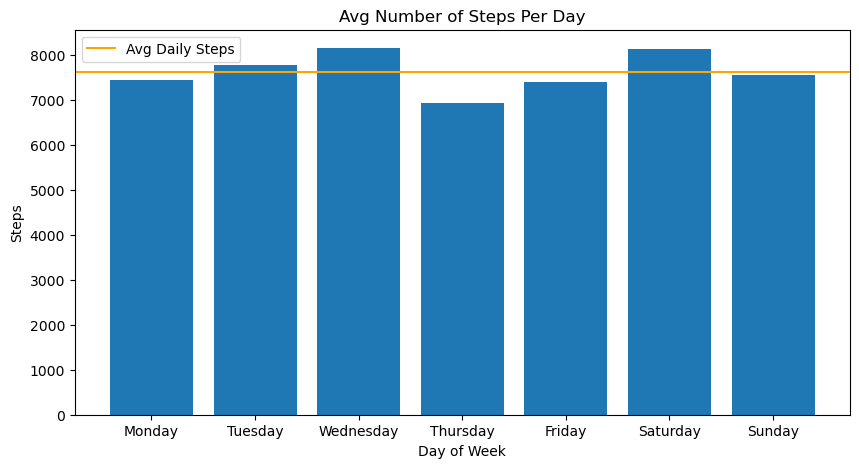

In [141]:
#https://www.kaggle.com/code/victoriamcmath/fitness-tracker-case-study
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=dailyActivity_Sleep.groupby(['Day_of_Week'])
avg_daily_steps = day_grp['TotalSteps'].mean()
avg_steps = dailyActivity_Sleep['TotalSteps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_steps.mean(), color= 'orange', label='Avg Daily Steps')
ax.set_ylabel('Steps')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Number of Steps Per Day')

plt.legend()
plt.show()


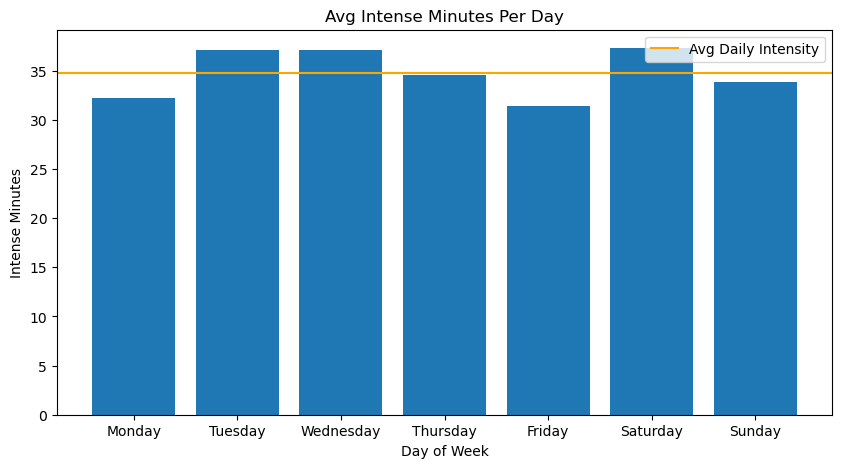

In [142]:
dailyActivity_Sleep["IntenseMinutes"]=dailyActivity_Sleep["VeryActiveMinutes"]+dailyActivity_Sleep["FairlyActiveMinutes"]

ig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=dailyActivity_Sleep.groupby(['Day_of_Week'])
avg_daily_intense_mins = day_grp['IntenseMinutes'].mean()
avg_intense_minutes = dailyActivity_Sleep['IntenseMinutes'].mean()

plt.bar(avg_daily_intense_mins.index, avg_daily_intense_mins)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_intense_mins.mean(), color= 'orange', label='Avg Daily Intensity')
ax.set_ylabel('Intense Minutes')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Intense Minutes Per Day')

plt.legend()
plt.show()

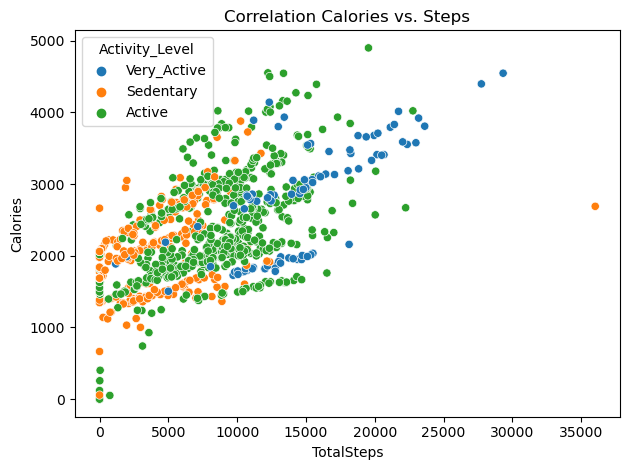

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   

  Day_of_Week  N_Day_of_Week  IntenseMinutes Activity_Level  
0     Tuesday              1              38    Very_Active  
1   Wednesday              2              40    Very_Active  
2    Thursday              3              41    Very_Active  
3      Friday              4              63    Very_Active  
4    Saturday              5              46    Very_Active

In [143]:
#https://www.kaggle.com/code/victoriamcmath/fitness-tracker-case-study
id_grp = dailyActivity_Sleep.groupby(['Id'])
id_avg_step = id_grp['TotalSteps'].mean().sort_values(ascending=False)

id_avg_step = id_avg_step.to_frame()
conditions = [(id_avg_step <=6000), (id_avg_step > 6000) & (id_avg_step < 12000), (id_avg_step >=12000)]
values = ['Sedentary', 'Active', 'Very_Active']
id_avg_step['Activity_Level'] = np.select(conditions, values)
id_activity_level = id_avg_step['Activity_Level']
dailyActivity_Sleep['Activity_Level'] = [id_activity_level[c] for c in dailyActivity_Sleep['Id']]

ax = sns.scatterplot(x="TotalSteps", y= "Calories", data=dailyActivity_Sleep, hue=dailyActivity_Sleep['Activity_Level'])
plt.title('Correlation Calories vs. Steps')

plt.tight_layout()
plt.show()
dailyActivity_Sleep.head()

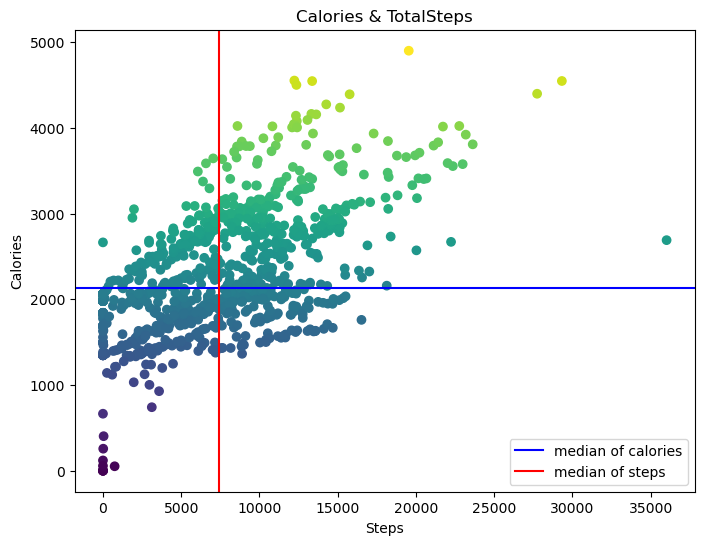

In [144]:
plt.figure(figsize=(8,6))
plt.scatter(dailyActivity_Sleep['TotalSteps'] ,dailyActivity_Sleep['Calories'], c=dailyActivity_Sleep['Calories'])

median_steps = 7405
median_calories = 2134

plt.axhline(median_calories, color = 'b', label = 'median of calories')
plt.axvline(median_steps, color = 'r', label = 'median of steps')

plt.xlabel('Steps')
plt.ylabel('Calories')
plt.title('Calories & TotalSteps')

plt.legend()
plt.show()

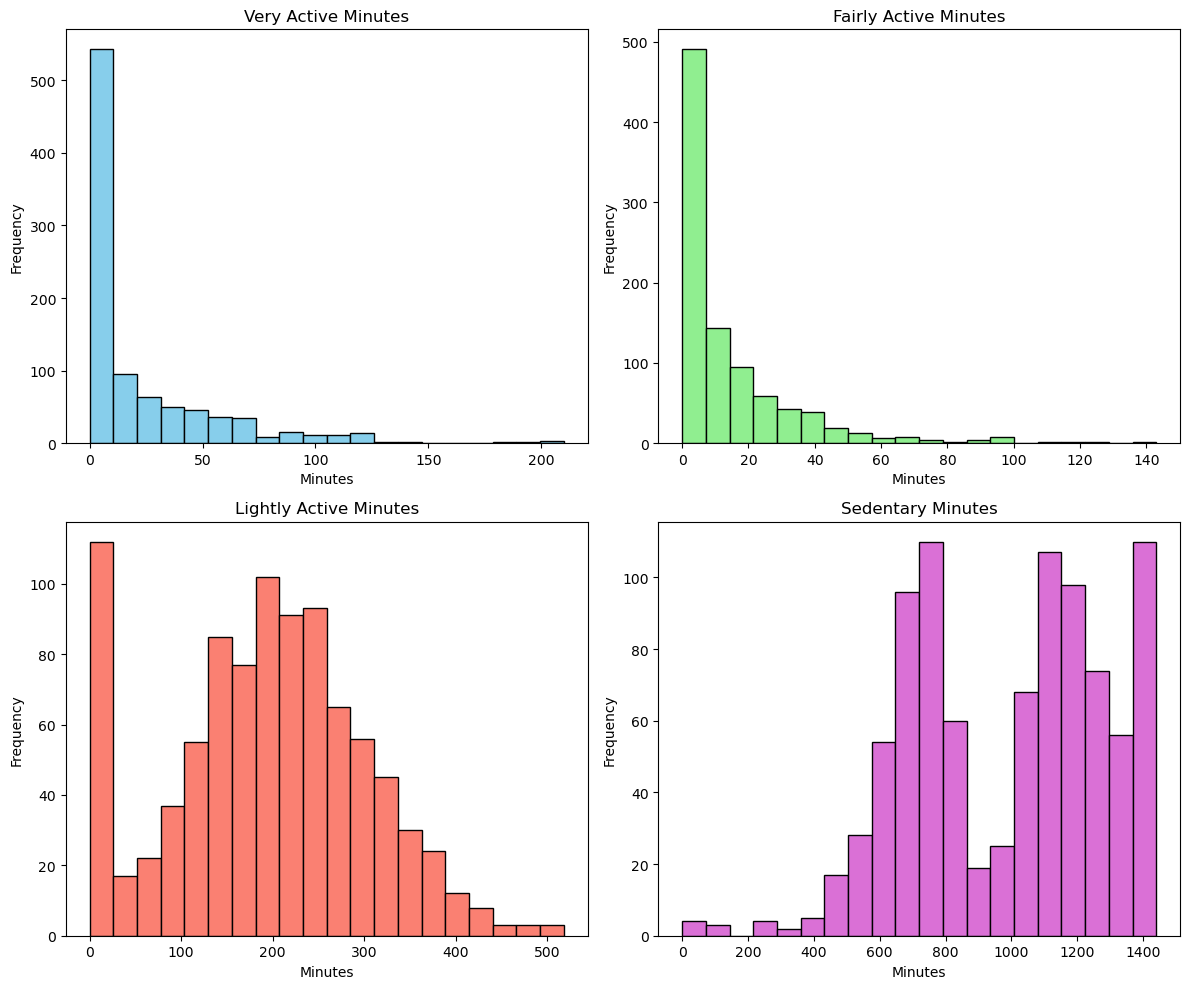

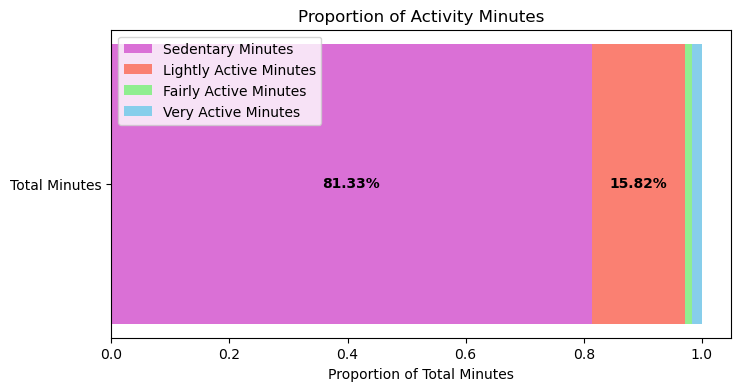

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

dailyActivity_Sleep['VeryActiveMinutes'].plot.hist(ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Very Active Minutes')
axes[0, 0].set_xlabel('Minutes')
axes[0, 0].set_ylabel('Frequency')

dailyActivity_Sleep['FairlyActiveMinutes'].plot.hist(ax=axes[0, 1], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Fairly Active Minutes')
axes[0, 1].set_xlabel('Minutes')
axes[0, 1].set_ylabel('Frequency')

dailyActivity_Sleep['LightlyActiveMinutes'].plot.hist(ax=axes[1, 0], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Lightly Active Minutes')
axes[1, 0].set_xlabel('Minutes')
axes[1, 0].set_ylabel('Frequency')

dailyActivity_Sleep['SedentaryMinutes'].plot.hist(ax=axes[1, 1], bins=20, color='orchid', edgecolor='black')
axes[1, 1].set_title('Sedentary Minutes')
axes[1, 1].set_xlabel('Minutes')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#show common proportion of how much time of intensity people dedicate to each category
def single_stack_graph_minutes(dailyActivities_Sleep):
    sumSedentary=dailyActivities_Sleep["SedentaryMinutes"].sum()
    sumLightly=dailyActivities_Sleep["LightlyActiveMinutes"].sum()
    sumFairly=dailyActivities_Sleep["FairlyActiveMinutes"].sum()
    sumVery=dailyActivities_Sleep["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes')
    plt.legend()
    plt.show()

# Assuming df is the DataFrame loaded from the CSV file
single_stack_graph_minutes(dailyActivity_Sleep)

    

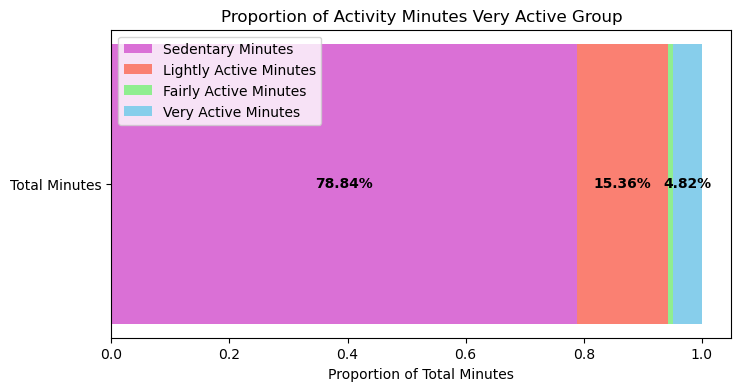

In [146]:
def single_stack_graph_minutes_veryActive(dailyActivities):
    very_active_group = dailyActivities[dailyActivities["Activity_Level"] == "Very_Active"]
    sumSedentary=very_active_group["SedentaryMinutes"].sum()
    sumLightly=very_active_group["LightlyActiveMinutes"].sum()
    sumFairly=very_active_group["FairlyActiveMinutes"].sum()
    sumVery=very_active_group["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1,bars3]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes Very Active Group')
    plt.legend()
    plt.show()
    
single_stack_graph_minutes_veryActive(dailyActivity_Sleep)

In [147]:
#https://saturncloud.io/blog/how-to-select-row-with-max-value-in-column-from-pandas-groupby-groups/#:~:text=Using%20groupby()%20and%20idxmax()&text=groupby()%20groups%20the%20data,Score'%20column%20for%20each%20group.&text=Here%2C%20idx%20is%20a%20Pandas,maximum%20value%20for%20each%20group.
def maximum_steps_per_Id(df: pd.DataFrame):
    idx = df.groupby("Id")["TotalSteps"].idxmax()
    max_scores = df.loc[idx, ["Id", "TotalSteps"]]
    return max_scores.head()

def average_steps_per_Id(df: pd.DataFrame):
    group = df.groupby("Id")
    avg_scores = group["TotalSteps"].mean()
    return avg_scores.head()



In [148]:
maximum_steps_per_Id(dailyActivity_Sleep)

Id  TotalSteps
15   1503960366       18134
50   1624580081       36019
80   1644430081       18213
101  1844505072        8054
143  1927972279        3790

In [149]:
average_steps_per_Id(dailyActivity_Sleep)

Id
1503960366    12116.741935
1624580081     5743.903226
1644430081     7282.966667
1844505072     2580.064516
1927972279      916.129032
Name: TotalSteps, dtype: float64

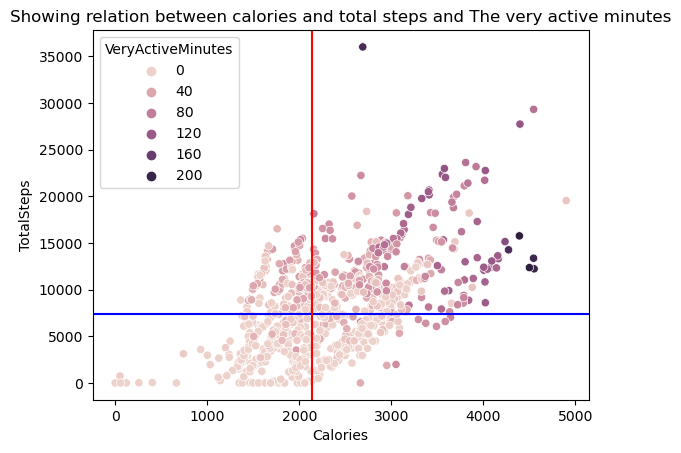

In [150]:
sns.scatterplot(x = "Calories",
                y= "TotalSteps",
                hue="VeryActiveMinutes",
                data = dailyActivity_Sleep)
median_steps = 7405
median_calories = 2134

plt.axhline(median_steps, color = 'b', label = 'median of steps')
plt.axvline(median_calories, color = 'r', label = 'median of calories')

plt.title("Showing relation between calories and total steps and The very active minutes")
plt.show()

# 2: Sleep Analysis

## 2.1: Analysis sleep day 

First of all, EDA for the sleep day dataset

In [151]:
print(sleepday.shape)

(413, 5)


In [152]:
sleepday.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [153]:
sleepday.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [154]:
sleepday.duplicated().sum()

3

Presence of 3 duplicates, which we will have to delete with the drop duplicates function.

In [155]:
sleepday1 = sleepday.drop_duplicates()
sleepday1.duplicated().sum()

0

In [156]:
sleepday1.shape

(410, 5)

In [157]:
sleepday1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  410 non-null    int64 
 1   SleepDay            410 non-null    object
 2   TotalSleepRecords   410 non-null    int64 
 3   TotalMinutesAsleep  410 non-null    int64 
 4   TotalTimeInBed      410 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.2+ KB


In [158]:
sleepday1.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [159]:
sleepday1.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [160]:
sleepday1.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [162]:
sleepday1["SleepDay"] = pd.to_datetime(sleepday1["SleepDay"], errors='coerce')

sleepday1 = sleepday1.dropna(subset=["SleepDay"])

sleepday1["Day_of_Week"] = sleepday1["SleepDay"].dt.day_name()

sleepday1["N_Day_of_Week"] = sleepday1["SleepDay"].dt.weekday



Add a two columns to Sleepday1 which represent the actual day of the week of a date in textual and numerical form. 

For example, 2016-04-12 is Tuesday in Day_of_Week(textual) and 1 in N_Day_of_Week.

Below we ensure that there is no anomalies for Time To Fall Asleep. Time To Fall Asleep = TotalTimeInBed - TotalMinutesAsleep. Therefore, if TotalMinutesAsleep is higher than TotalTimeInBed, then Time To Fall Asleep will result in a negative number which is an anomaly.

In [163]:
countAnomaly = 0
for _,entry in sleepday1.iterrows():
    asleep=entry["TotalMinutesAsleep"]
    inBed=entry["TotalTimeInBed"]
    if asleep>inBed:
        countAnomaly+=1
    
print(countAnomaly)


0


Luckily, no anomalies

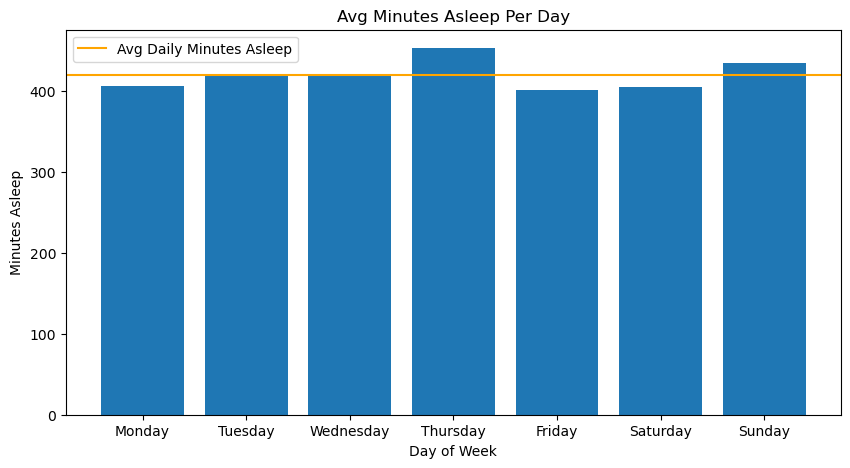

In [164]:
ig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=sleepday1.groupby(['Day_of_Week'])
avg_daily_asleep_mins = day_grp['TotalMinutesAsleep'].mean()
avg_asleep_minutes = sleepday1['TotalMinutesAsleep'].mean()

plt.bar(avg_daily_asleep_mins.index, avg_daily_asleep_mins)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_asleep_mins.mean(), color= 'orange', label='Avg Daily Minutes Asleep')
ax.set_ylabel('Minutes Asleep')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Minutes Asleep Per Day')

plt.legend(loc="upper left")
plt.show()

Plot of average minutes asleep each day.

Thursday Maximum = 452.75

Friday Minimum = 402.36

In [165]:
print(avg_asleep_minutes)

419.17317073170733


Classifying individual depending on their average sleep category could result in more interesting results.

https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need
https://www.calm.com/blog/oversleeping-tips#:~:text=Oversleeping%20varies%20by%20age%20and,check%20in%20with%20your%20doc.
 
From this two resources, we came up with the following quantity of sleep categories:

1)Deprieved: <7 hours (<420 minutes)

2)Normal: 7-9 hours(420-540 minutes)

3)Excessive: 9< hours(540 minutes)

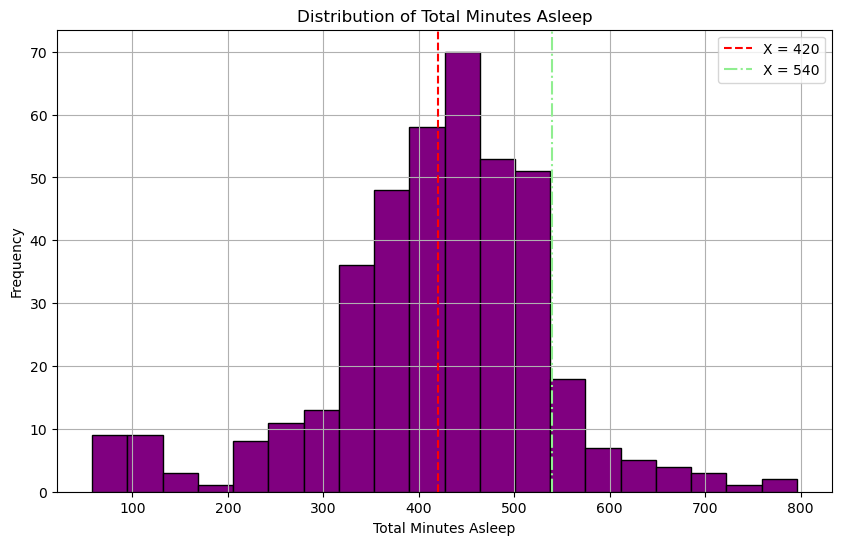

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(sleepday1['TotalMinutesAsleep'], bins=20, color='purple', edgecolor='black')

plt.axvline(x=420, color='red', linestyle='--', label='X = 420')
plt.axvline(x=540, color='lightgreen', linestyle='-.', label='X = 540')

plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

Total Minutes asleep follows similar form to Normal distribution, with some outliers at the very beginning of the x axis which means lack of sleep

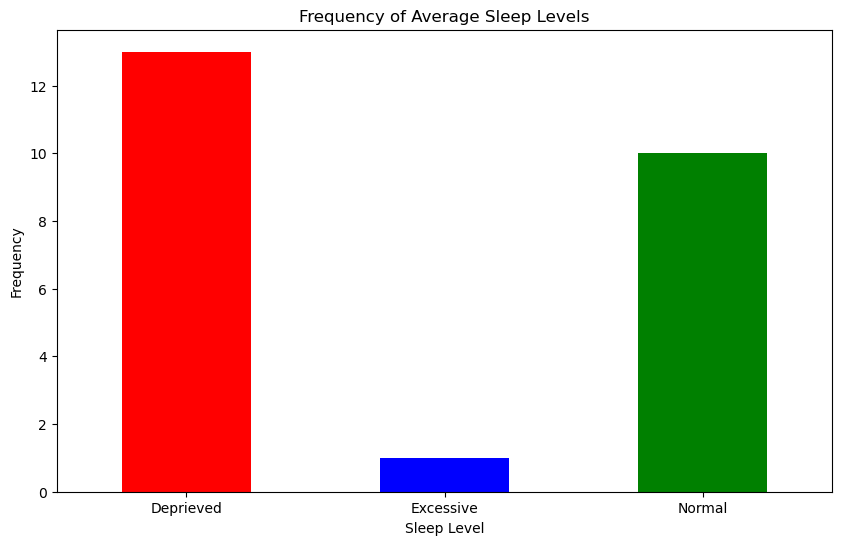

In [167]:
#group by Id and compute average


id_grp_sleep = sleepday1.groupby(['Id'])
id_avg_sleep = id_grp_sleep['TotalMinutesAsleep'].mean().sort_values(ascending=False)

id_avg_sleep = id_avg_sleep.to_frame()
intervals = [(id_avg_sleep <= 420), (id_avg_sleep > 420) & (id_avg_sleep < 540), (id_avg_sleep >= 540)]
values_sleep = ['Deprieved', 'Normal', 'Excessive']
id_avg_sleep['Sleep_Level'] = np.select(intervals, values_sleep)
id_sleep_level = id_avg_sleep['Sleep_Level']
sleepday1.loc[:, 'Sleep_Level'] = sleepday1['Id'].map(id_sleep_level)

sleep_level_frequency = id_avg_sleep["Sleep_Level"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sleep_level_frequency.plot(kind='bar', color=['red', 'blue', 'green'])

plt.title('Frequency of Average Sleep Levels')
plt.xlabel('Sleep Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

sleep deprived on average(x<7 hours) = 13 users

sleep normal on average(7<x<9 hours) = 10 users

sleep excessive on average (x>9 hours) = 1 user

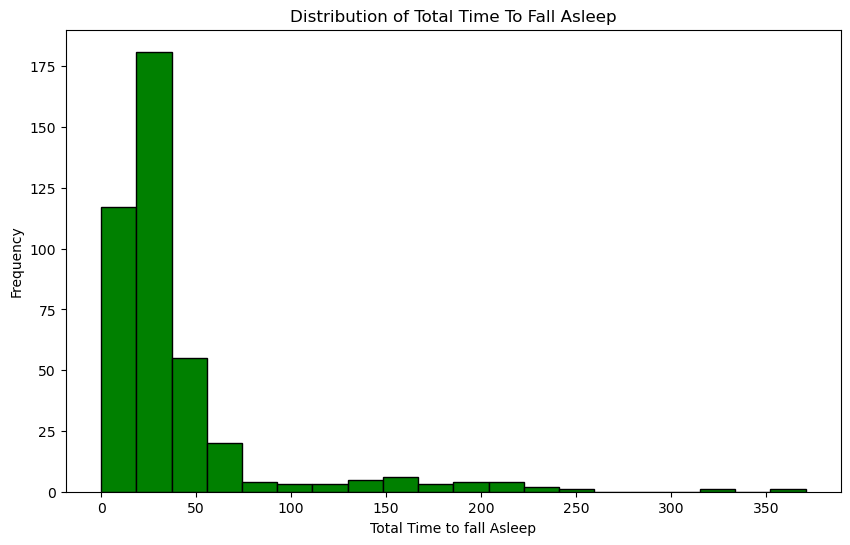

In [168]:
sleepday1.loc[:, "TimeToFallAsleep"] = sleepday1["TotalTimeInBed"] - sleepday1["TotalMinutesAsleep"]

plt.figure(figsize=(10, 6))
plt.hist(sleepday1['TimeToFallAsleep'], bins=20, color='green', edgecolor='black')


plt.title('Distribution of Total Time To Fall Asleep')
plt.xlabel('Total Time to fall Asleep')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Total Minutes Asleep(= Total Time in bed - Total Minutes Asleep) distribution follows a similar form to the chi squared and exponential distribution. 

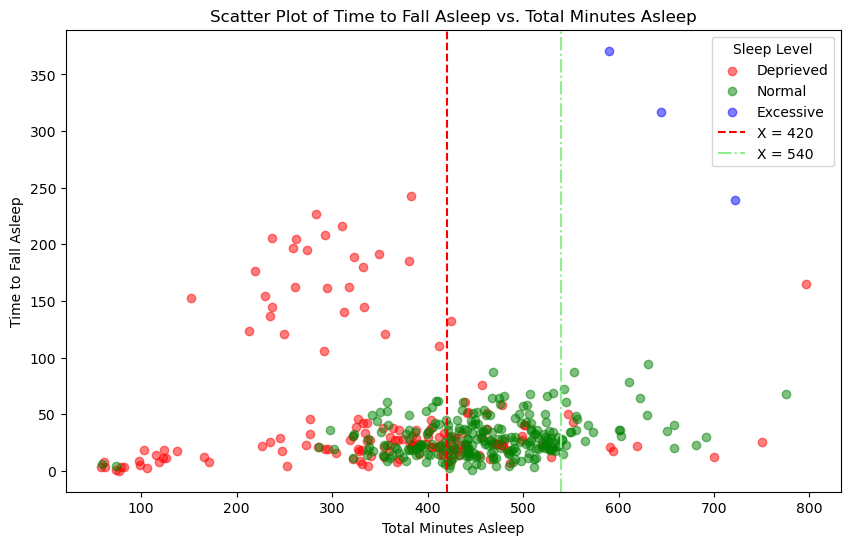

In [169]:
#time to fall asleep vs time slept
colors = {'Deprieved': 'red', 'Normal': 'green', 'Excessive': 'blue'}
plt.figure(figsize=(10, 6))

for sleep_level in values_sleep:
    subset = sleepday1[sleepday1['Sleep_Level'] == sleep_level]
    plt.scatter(subset['TotalMinutesAsleep'], subset['TimeToFallAsleep'],
                c=colors[sleep_level], label=sleep_level, alpha=0.5)

plt.axvline(x=420, color='red', linestyle='--', label='X = 420')
plt.axvline(x=540, color='lightgreen', linestyle='-.', label='X = 540')

plt.title('Scatter Plot of Time to Fall Asleep vs. Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Time to Fall Asleep')
plt.legend(title='Sleep Level')
plt.show()

Plotting Time To Fall Asleep against Total Minutes Asleep, it looks like:

- Variance of sleep deprived category is more high for both variables compared to Normal category, which seems more stable and packed together

- There are only 3 observations for the Excessive average sleep category.

Proved below:

In [170]:
groups_level = sleepday1.groupby("Sleep_Level")["TimeToFallAsleep"]
print(groups_level.var())
print(groups_level.size())


Sleep_Level
Deprieved    3451.204355
Excessive    4404.000000
Normal        292.153831
Name: TimeToFallAsleep, dtype: float64
Sleep_Level
Deprieved    162
Excessive      3
Normal       245
Name: TimeToFallAsleep, dtype: int64


## 2.2: Analysis sleep day merged with daily activity

Merge sleep day with the main dataset daily Activity to find relations of sleep with activity. Merge by Id and date:

In [171]:
def merge_dailyActivity_sleepday(dailyActivity: pd.DataFrame, sleepday: pd.DataFrame): 
   
    df = pd.merge(sleepday,dailyActivity,left_on = ["Id","SleepDay"],right_on = ["Id","ActivityDate"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    
    return df

First of all, some EDA for the merged dataset.

In [173]:
activityAndSleepday = merge_dailyActivity_sleepday(dailyActivity_Sleep,sleepday1)
activityAndSleepday.isnull().sum()

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
Day_of_Week_x               0
N_Day_of_Week_x             0
Sleep_Level                 0
TimeToFallAsleep            0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week_y               0
N_Day_of_Week_y             0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [174]:
activityAndSleepday.isna().sum()

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
Day_of_Week_x               0
N_Day_of_Week_x             0
Sleep_Level                 0
TimeToFallAsleep            0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week_y               0
N_Day_of_Week_y             0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [176]:
activityAndSleepday.duplicated().sum()

0

In [177]:
activityAndSleepday1 = activityAndSleepday.drop_duplicates()
activityAndSleepday1.duplicated().sum()

0

In [178]:
activityAndSleepday1.shape

(410, 27)

In [179]:
activityAndSleepday1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   SleepDay                  410 non-null    datetime64[ns]
 2   TotalSleepRecords         410 non-null    int64         
 3   TotalMinutesAsleep        410 non-null    int64         
 4   TotalTimeInBed            410 non-null    int64         
 5   Day_of_Week_x             410 non-null    object        
 6   N_Day_of_Week_x           410 non-null    int32         
 7   Sleep_Level               410 non-null    object        
 8   TimeToFallAsleep          410 non-null    int64         
 9   ActivityDate              410 non-null    datetime64[ns]
 10  TotalSteps                410 non-null    int64         
 11  TotalDistance             410 non-null    float64       
 12  TrackerDistance       

In [180]:
#count if for each entry N_day_week_x(one datset) does not match N_day_week_y(the other dataset)
countAnomalyDay = 0
for _,entry in activityAndSleepday1.iterrows():
    dayX=entry["N_Day_of_Week_x"]
    dayY=entry["N_Day_of_Week_y"]
    if dayX != dayY:
        countAnomalyDay+=1
    
print(countAnomaly)


0


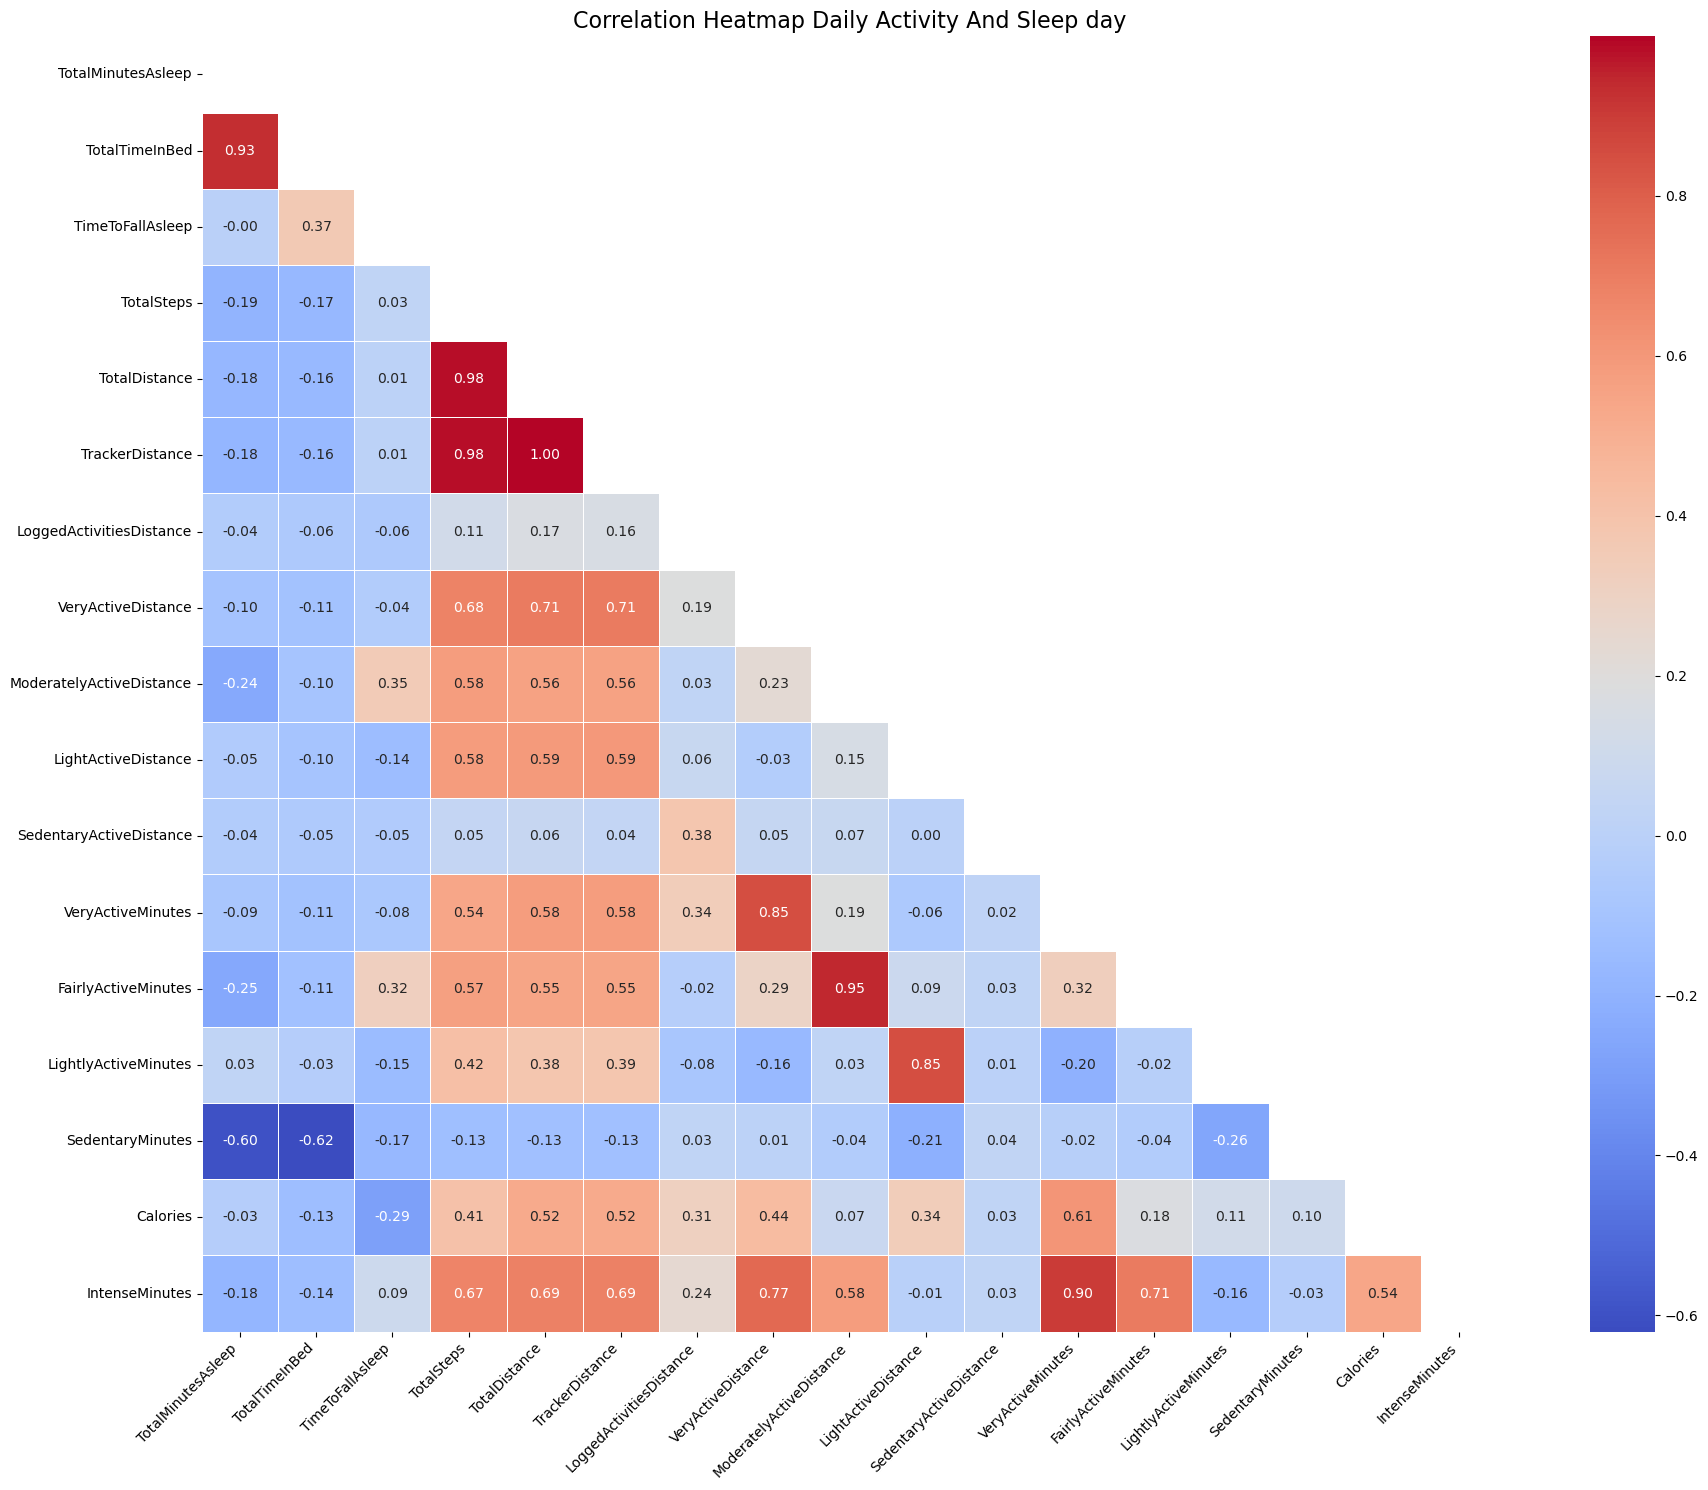

In [78]:
#activityAndSleepday1.corr()--- do correlations
dfCorrelation = activityAndSleepday1.iloc[:, 1:] 
dfCorrelation = dfCorrelation.drop("N_Day_of_Week_x", axis=1)
dfCorrelation = dfCorrelation.drop("N_Day_of_Week_y", axis=1)
dfCorrelation = dfCorrelation.drop("TotalSleepRecords", axis=1)
numeric_columns = dfCorrelation.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white',
            fmt=".2f", square=True, cbar=True, mask = mask)
plt.title("Correlation Heatmap Daily Activity And Sleep day", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From all the paired correlations, the one that stands out the most it the high negative correlation between Sedentary Minutes and Total Minutes Asleep.

In [79]:
#describe TotalMinutesAsleep by category Activity level
describeVeryActive = activityAndSleepday1[activityAndSleepday1["Activity_Level"]=="Very_Active"]
describeActive = activityAndSleepday1[activityAndSleepday1["Activity_Level"]=="Active"]
describeSedentary = activityAndSleepday1[activityAndSleepday1["Activity_Level"]=="Sedentary"]

print("Very Active(TotalMinutesAsleep): \n ",describeVeryActive["TotalMinutesAsleep"].describe())
print("Active(TotalMinutesAsleep): \n ",describeActive["TotalMinutesAsleep"].describe())
print("Sedentary(TotalMinutesAsleep): \n ",describeSedentary["TotalMinutesAsleep"].describe())



Very Active(TotalMinutesAsleep): 
  count     28.00000
mean     353.50000
std      112.15515
min       74.00000
25%      299.25000
50%      339.00000
75%      383.25000
max      700.00000
Name: TotalMinutesAsleep, dtype: float64
Active(TotalMinutesAsleep): 
  count    291.000000
mean     421.044674
std      117.245608
min       58.000000
25%      375.500000
50%      435.000000
75%      485.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64
Sedentary(TotalMinutesAsleep): 
  count     91.000000
mean     433.395604
std      119.728942
min       61.000000
25%      379.500000
50%      442.000000
75%      511.000000
max      750.000000
Name: TotalMinutesAsleep, dtype: float64


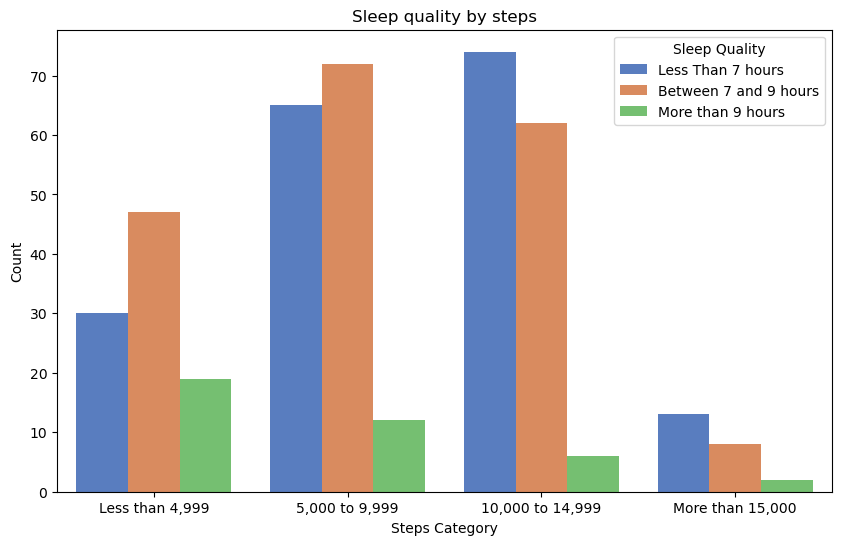

In [80]:

# Create DataFrame
activityAndSleep_copy = activityAndSleepday1.copy()

# Define the bins and labels
binsSteps = [0, 4999, 9999, 14999, float('inf')]
binsSleep = [0, 420, 540, float('inf')]
labelsSteps = ["Less than 4,999", "5,000 to 9,999", "10,000 to 14,999", "More than 15,000"]
labelsSleep = ["Less Than 7 hours", "Between 7 and 9 hours", "More than 9 hours"]

# Create a new column 'Steps Category' by binning the 'Steps' column
activityAndSleep_copy["Steps Category"] = pd.cut(activityAndSleep_copy["TotalSteps"], bins=binsSteps, labels=labelsSteps)
activityAndSleep_copy["Sleep Category"] = pd.cut(activityAndSleep_copy["TotalMinutesAsleep"], bins=binsSleep, labels=labelsSleep)

# Group by 'Steps Category' and 'Sleep Quality' and count the occurrences
grouped = activityAndSleep_copy.groupby(['Steps Category', 'Sleep Category']).size().reset_index(name="Frequency")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Steps Category", y="Frequency", hue="Sleep Category", data=grouped, palette="muted")

# Customize the plot
plt.title("Sleep quality by steps")
plt.xlabel("Steps Category")
plt.ylabel("Count")
plt.legend(title="Sleep Quality")
plt.show()

Both the the table and bar chart show that active level affect Total Minutes Asleep. To formally proove this, chi squared contingency table test and Kruskal test, with significance level of 5%

In [181]:
#statistical significance for time to fall asleep and activity level
#null: Total Minutes Asleep is equal among the different Activity_Level groups
group1MinutesAsleep = describeVeryActive["TotalMinutesAsleep"]
group2MinutesAsleep = describeActive["TotalMinutesAsleep"]
group3MinutesAsleep = describeSedentary["TotalMinutesAsleep"]

stat, p = kruskal(group1MinutesAsleep, group2MinutesAsleep, group3MinutesAsleep)

print("Kruskal-Wallis H test statistic(TotalMinutesAsleep):", stat)
print("p-value(TotalMinutesAsleep):", p)

Kruskal-Wallis H test statistic(TotalMinutesAsleep): 19.660732383868925
p-value(TotalMinutesAsleep): 5.379305480710529e-05


In [189]:
#https://www.youtube.com/watch?v=hTsxJqw2zMM
validSleep_Levels = ["Deprieved","Normal"]#drop Excessive as only 3 total observations
dropExcessiveSleep = activityAndSleepday1[activityAndSleepday1["Sleep_Level"].isin(validSleep_Levels)]
myfield1 = dropExcessiveSleep["Activity_Level"]
myfield2 = dropExcessiveSleep["Sleep_Level"]

myCrosstable = pd.crosstab(myfield1,myfield2)
print(myCrosstable)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
print("\n Expected Values:",exp)
print("\n P value", pVal)

Sleep_Level     Deprieved  Normal
Activity_Level                   
Active                 89     202
Sedentary              45      43
Very_Active            28       0

 Expected Values: [[115.82800983 175.17199017]
 [ 35.02702703  52.97297297]
 [ 11.14496314  16.85503686]]

 P value 3.4586921804517146e-13


In [83]:
#describe TimeToFallAsleep by category Activity level
print("Very Active(TimeToFallAsleep): \n ",describeVeryActive["TimeToFallAsleep"].describe())
print("Active(TimeToFallAsleep): \n ",describeActive["TimeToFallAsleep"].describe())
print("Sedentary(TimeToFallAsleep): \n ",describeSedentary["TimeToFallAsleep"].describe())


Very Active(TimeToFallAsleep): 
  count    28.000000
mean     20.964286
std      10.228798
min       1.000000
25%      16.750000
50%      20.500000
75%      27.000000
max      46.000000
Name: TimeToFallAsleep, dtype: float64
Active(TimeToFallAsleep): 
  count    291.000000
mean      41.756014
std       46.389642
min        1.000000
25%       16.500000
50%       26.000000
75%       44.500000
max      243.000000
Name: TimeToFallAsleep, dtype: float64
Sedentary(TimeToFallAsleep): 
  count     91.000000
mean      37.131868
std       53.114177
min        0.000000
25%       19.500000
50%       26.000000
75%       36.500000
max      371.000000
Name: TimeToFallAsleep, dtype: float64


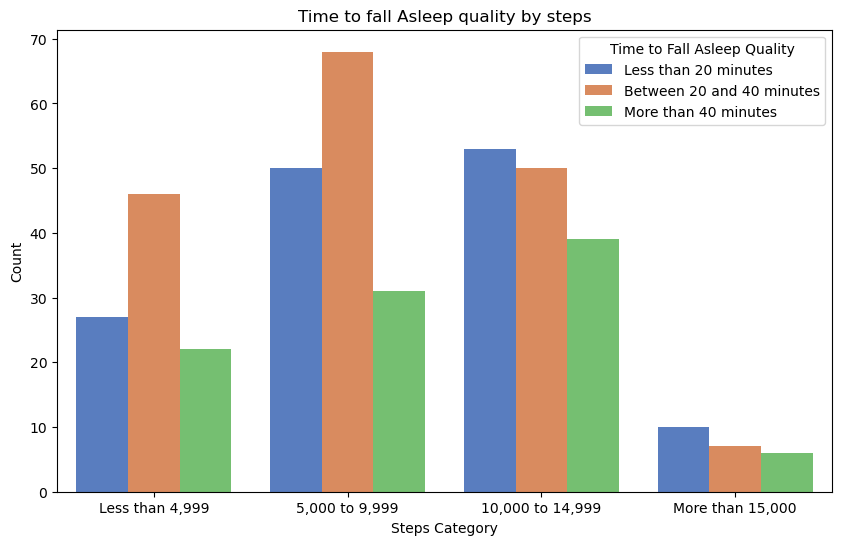

In [183]:

binsFallingAsleep = [0, 20, 40, float('inf')]
labelsFallingAsleep = ["Less than 20 minutes", "Between 20 and 40 minutes", "More than 40 minutes"]

activityAndSleep_copy["Falling Asleep Category"] = pd.cut(activityAndSleep_copy["TimeToFallAsleep"], bins=binsFallingAsleep, labels=labelsFallingAsleep)

grouped2 = activityAndSleep_copy.groupby(['Steps Category', 'Falling Asleep Category']).size().reset_index(name="Frequency")

plt.figure(figsize=(10, 6))
sns.barplot(x="Steps Category", y="Frequency", hue="Falling Asleep Category", data=grouped2, palette="muted")

plt.title("Time to fall Asleep quality by steps")
plt.xlabel("Steps Category")
plt.ylabel("Count")
plt.legend(title="Time to Fall Asleep Quality")
plt.show()

Both table and bar chart proove that activity level affect Time to Fall Asleep. To formally this, Kruskal test with significance level of 5%.

In [185]:
#null: Time to fall Asleep Asleep is equal among the different Activity_Level groups
group1MinutesFallAsleep = describeVeryActive["TimeToFallAsleep"]
group2MinutesFallAsleep = describeActive["TimeToFallAsleep"]
group3MinutesFallAsleep = describeSedentary["TimeToFallAsleep"]

stat, p = kruskal(group1MinutesFallAsleep, group2MinutesFallAsleep, group3MinutesFallAsleep)

print("Kruskal-Wallis H test statistic(TimeToFallAsleep):", stat)
print("p-value(TimeToFallAsleep):", p)

Kruskal-Wallis H test statistic(TimeToFallAsleep): 6.685317619771698
p-value(TimeToFallAsleep): 0.03534286273385773


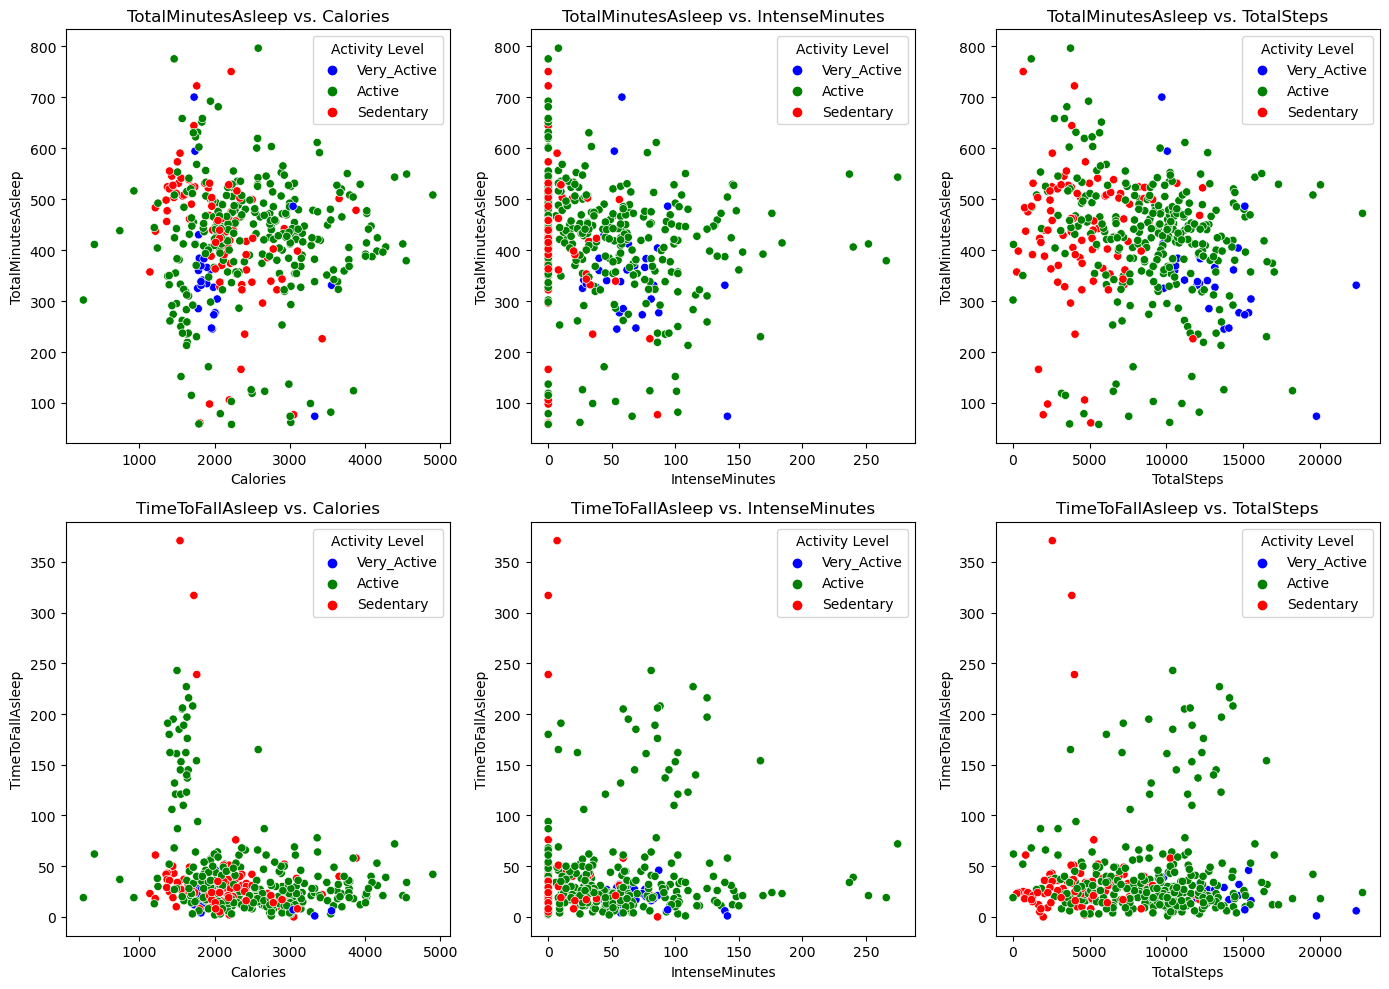

In [86]:
def plot_sleep_vs_variables(df: pd.DataFrame):
    
    variables = ["Calories", "IntenseMinutes", "TotalSteps"]
    sleep_factors = ["TotalMinutesAsleep", "TimeToFallAsleep"]
    
    # Define colors for each Activity_level
    colors = {'Sedentary': 'red', 'Active': 'green', 'Very_Active': 'blue'}    
    # Create a figure with subplots
    plt.figure(figsize=(14, 10))
    
    # Iterate over each sleep factor
    for j, sleep_factor in enumerate(sleep_factors, 1):
        # Iterate over each activity variable
        for i, activity in enumerate(variables, 1):
            
            plt.subplot(2, 3, (j-1)*3 + i)  # Calculate the subplot index
            # Scatter plot with Activity_level coloring
            sns.scatterplot(data=df, x=activity, y=sleep_factor, hue='Activity_Level', palette=colors)
            plt.title(f'{sleep_factor} vs. {activity}')
            plt.xlabel(activity)
            plt.ylabel(sleep_factor)
            plt.legend(title='Activity Level', loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
   
    
plot_sleep_vs_variables(activityAndSleepday1)

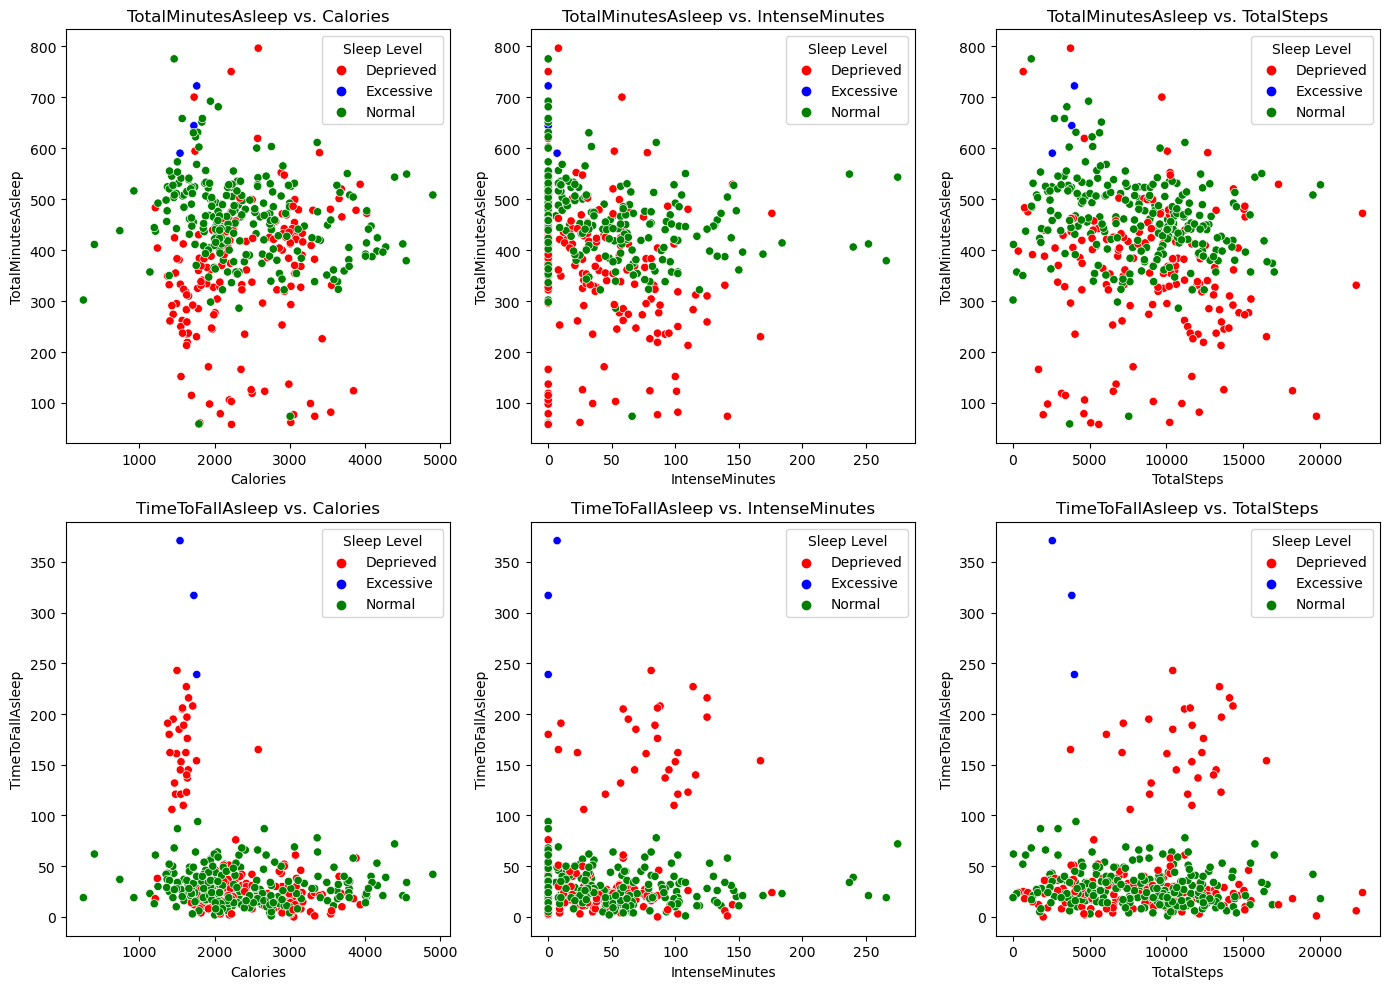

In [87]:
def plot_sleepLevel_and_sleep(df: pd.DataFrame):
    #df= df[df["CorrectTotalTime"]==True]
    variables = ["Calories", "IntenseMinutes", "TotalSteps"]
    sleep_factors = ["TotalMinutesAsleep", "TimeToFallAsleep"]
    
    colors = {"Deprieved": 'red', "Normal": 'green', "Excessive": 'blue'}    
    # Create a figure with subplots
    plt.figure(figsize=(14, 10))
    #2026352035,3977333714,4445114986
    # Iterate over each sleep factor
    for j, sleep_factor in enumerate(sleep_factors, 1):
        # Iterate over each activity variable
        for i, activity in enumerate(variables, 1):
            
            plt.subplot(2, 3, (j-1)*3 + i)  # Calculate the subplot index
            # Scatter plot with Activity_level coloring
            sns.scatterplot(data=df, x=activity, y=sleep_factor, hue='Sleep_Level', palette=colors)
            plt.title(f'{sleep_factor} vs. {activity}')
            plt.xlabel(activity)
            plt.ylabel(sleep_factor)
            plt.legend(title='Sleep Level', loc='upper right')
    
    plt.tight_layout()
    plt.show()


plot_sleepLevel_and_sleep(activityAndSleepday1)

We can see that categorized scatter plot for both categories(activity level and sleep level)show very noisy data compared to the categorized bar chart, and hypothesis testing. No clear tendency is seen for scatter plots.

### Daily ActivityMinutes  vs time slept and time to fall asleep

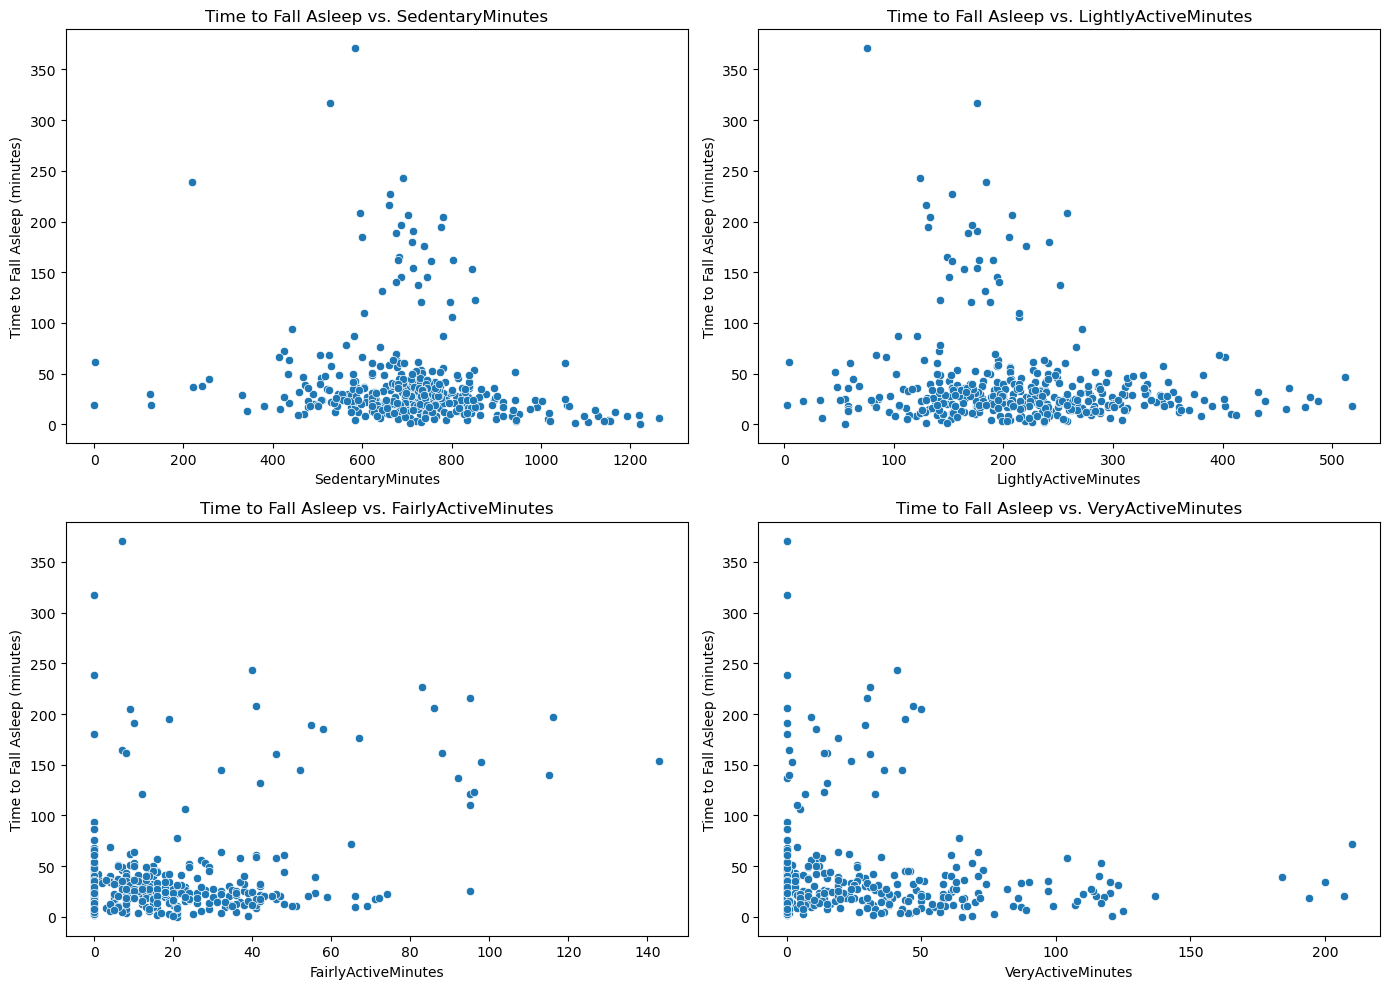

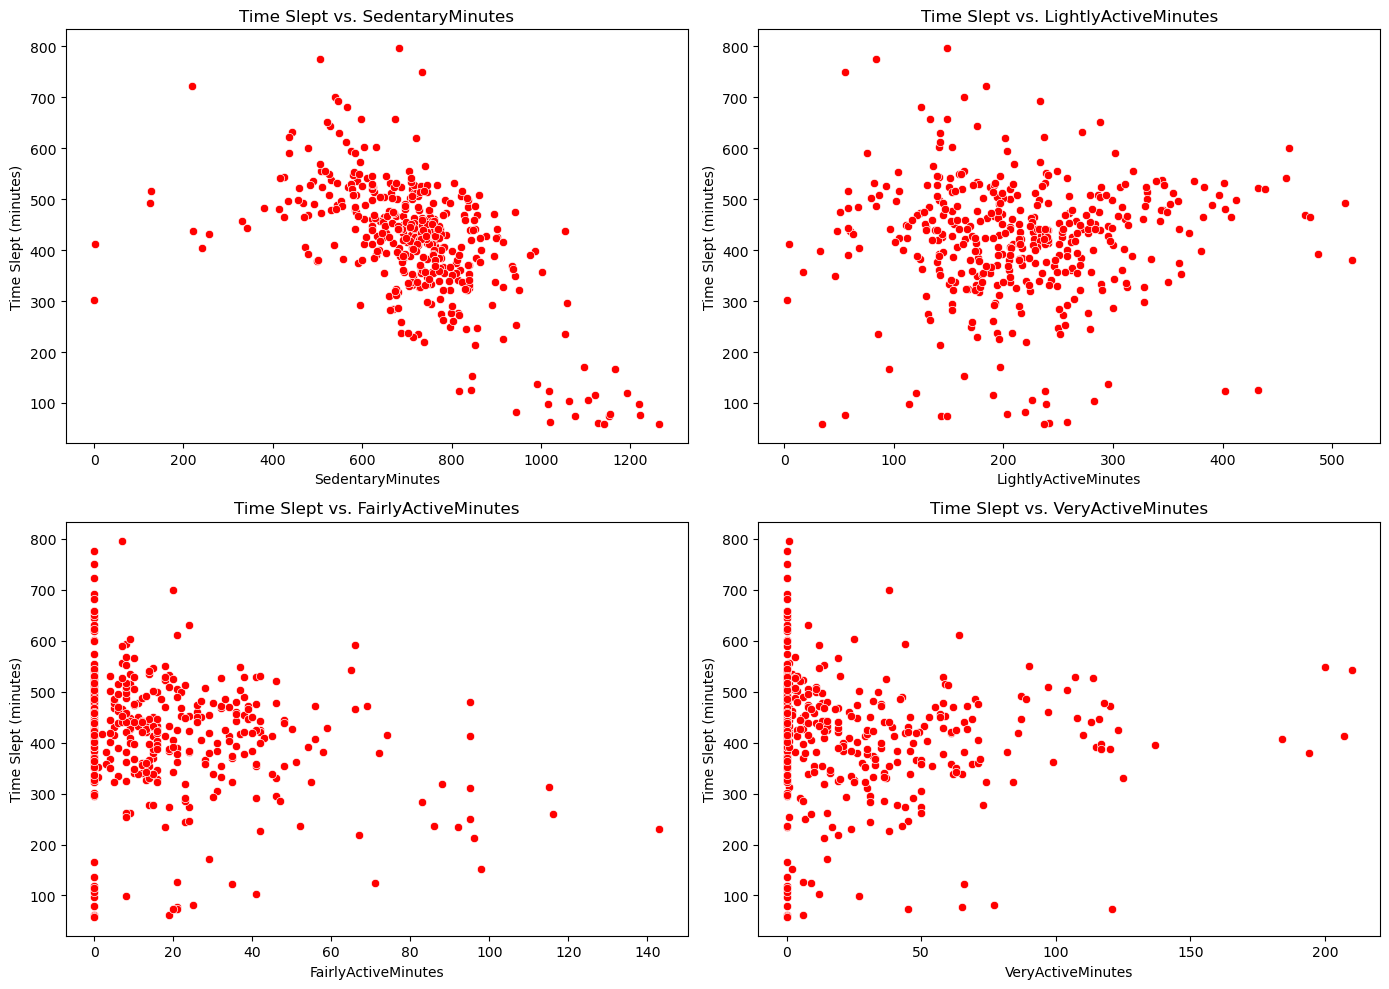

In [187]:
#merge sleep day and daily intensities

def plot_time_to_fall_asleep_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TimeToFallAsleep")
        plt.title(f'Time to Fall Asleep vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.tight_layout()
    plt.show()
    
def plot_time_slept_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TotalMinutesAsleep",color=["red"])
        plt.title(f'Time Slept vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time Slept (minutes)')
    
    plt.tight_layout()
    plt.show()

plot_time_to_fall_asleep_vs_activity_minutes(activityAndSleepday1)
plot_time_slept_vs_activity_minutes(activityAndSleepday1)


No clear pattern for Time To fall(blue) asleep against each of the active minutes per day. Only that as the intensity increases, the users do less of this activity a day(irrelevant to Time to fall Asleep).

On the other hand, Total Minutes Asleep(red) proves the high negative correlation for Sedentary minutes, meaning that users who slept less were more likely to do more inactive minutes a day. Very randomly scatterd data for Lightly active minutes. For Intense Minutes(Fairly Active and Very Active), we can observe high range of those users who did absolutely no intense minutes in the day and then stabalizes more in a sort of triangular horizontal form.

## 2.4: Conclusions Sleep Anlysis

- The users that are sleep deprived on average are less predictable and stable than users that are normal on average for Total Minutes Asleep and Time To Fall Asleep

- significant difference for activity levels and Total Minutes Asleep

- significant difference for activity levels and Time To Fall Asleep

- Users who sleep less are more likely to do less active minutes throughout the day

- Total Minutes Asleep follows similar distribution to Normal and Time To Fall Asleep simila distribution to chi squared/exponential

# 3: Is there a correlation between daily activity levels and average heart rate?

#### We understand activity levels to be defined by a mixture of the following:

    -Calories burnt

    -Distance travelled

    -Steps walked
    
    -Minutes active

WHO defines physical activity as any bodily movement produced by skeletal muscles that require energy expenditure. Physical activity refers to all movement including during leisure time, for transport to get to and from places, or as part of a person’s work.

#### How could activity levels be related two heartrate:

    1. People who exercise their bodies every day may have a healthier heart but still have a high heartrate on average because while they are performing any physical activity, their pulse rises significantly, affecting the mean.

    2. People who do little exercise could also have very high heartrate since performing any activity like walking home may require a bigger effort for their heart.

#### Goal of the section

The goal of this section is to perform an analysis on heartrate and on physical activity per day to evaluate if there is relation between activity level and heartrate.
Firstly, the correlation between heartrate and all other variables will be tested individually, and, in case there is no satisfactory results on the correlation coefficient obtained, a model will be implemented to see if heartrate can be determined/predicted by a composition of some of these features.

## 3.1: Data analysis

### 3.1.1: Analysis of daily_activity

In [254]:
daily_activity.head(10)


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   
5  1503960366    4/17/2016        9705           6.48             6.48   
6  1503960366    4/18/2016       13019           8.59             8.59   
7  1503960366    4/19/2016       15506           9.88             9.88   
8  1503960366    4/20/2016       10544           6.68             6.68   
9  1503960366    4/21/2016        9819           6.34             6.34   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   
5                       0.0                3.19                      0.78   
6                       0.0                3.25                      0.64   
7                       0.0                3.53                      1.32   
8                       0.0                1.96                      0.48   
9                       0.0                1.34                      0.35   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   
5                 2.51                      0.0                 38   
6                 4.71                      0.0                 42   
7                 5.03                      0.0                 50   
8                 4.24                      0.0                 28   
9                 4.65                      0.0                 19   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863  
5                   20                   164               539      1728  
6                   16                   233              1149      1921  
7                   31                   264               775      2035  
8                   12                   205               818      1786  
9                    8                   211               838      1775

#### Summary of the statistics regarding the dataset:

In [255]:
daily_activity.describe()


Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000                  0.000000   
25%                    0.000000            0.000000                  0.000000   
50%                    0.000000            0.210000                  0.240000   
75%                    0.000000            2.052500                  0.800000   
max                    4.942142           21.920000                  6.480000   

       LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
count           940.000000               940.000000         940.000000   
mean              3.340819                 0.001606          21.164894   
std               2.040655                 0.007346          32.844803   
min               0.000000                 0.000000           0.000000   
25%               1.945000                 0.000000           0.000000   
50%               3.365000                 0.000000           4.000000   
75%               4.782500                 0.000000          32.000000   
max              10.710000                 0.110000         210.000000   

       FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  \
count           940.000000            940.000000        940.000000   
mean             13.564894            192.812766        991.210638   
std              19.987404            109.174700        301.267437   
min               0.000000              0.000000          0.000000   
25%               0.000000            127.000000        729.750000   
50%               6.000000            199.000000       1057.500000   
75%              19.000000            264.000000       1229.500000   
max             143.000000            518.000000       1440.000000   

          Calories  
count   940.000000  
mean   2303.609574  
std     718.166862  
min       0.000000  
25%    1828.500000  
50%    2134.000000  
75%    2793.250000  
max    4900.000000

There are several things to consider regarding these statistics:

    1. Max values differ significantly from the 75% quantiles for all features.
    This is due to quantiles being computed with averages, so, despite most people (75%) might be below some value for a certain feature, the maximum value recorded for such feature does not take into account percentiles, making the difference considerably large.

    2. Features regarding sedentary minutes and total steps have a very high standard deviation.
    
    3. Some features barely have values, especially the feature LoggedActivitiesDistance has zeros in most of its entries, resulting in such abnormal statistics.

#### Number of users in the dataset and entries per user:

In [256]:
print("Daily Activity Dataset:", daily_activity.Id.nunique(), "unique users")
print('---------------------------------------------------------------')
print(daily_activity['Id'].value_counts())

Daily Activity Dataset: 33 unique users
---------------------------------------------------------------
Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


#### Duration of data collection, shape of the dataframe and type of the features:

In [257]:
print("Data in this file was collected from", daily_activity['ActivityDate'].min(), "to", daily_activity['ActivityDate'].max())
print('---------------------------------------------------------------')
print("Shape of Daily Activity:", daily_activity.shape)
print('---------------------------------------------------------------')
print(daily_activity.dtypes)

Data in this file was collected from 4/12/2016 to 5/9/2016
---------------------------------------------------------------
Shape of Daily Activity: (940, 15)
---------------------------------------------------------------
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


All of the features are of type int64 or float64 except for ActivityDate, which will not be a problem.


#### Check for null values and duplicates:

In [260]:
print("Daily Activity Dataset has", daily_activity.isnull().values.sum(), "missing values")
print('---------------------------------------------------------------')
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())

Daily Activity Dataset has 0 missing values
---------------------------------------------------------------
Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool


The dataset does not contain any null values or duplicates.

### 3.1.2: Analysis of heartrate_seconds:

In [261]:
heartrate_seconds.head(10)

Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101
5  2022484408  4/12/2016 7:22:05 AM     95
6  2022484408  4/12/2016 7:22:10 AM     91
7  2022484408  4/12/2016 7:22:15 AM     93
8  2022484408  4/12/2016 7:22:20 AM     94
9  2022484408  4/12/2016 7:22:25 AM     93

#### Summary of the statistics regarding the dataset:

In [262]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(heartrate_seconds.describe())
pd.reset_option('display.float_format')

                 Id      Value
count    2483658.00 2483658.00
mean  5513764629.27      77.33
std   1950223760.95      19.40
min   2022484408.00      36.00
25%   4388161847.00      63.00
50%   5553957443.00      73.00
75%   6962181067.00      88.00
max   8877689391.00     203.00


#### Number of users in the dataset and entries per user:

In [264]:
print("Heartrate seconds has:", heartrate_seconds.Id.nunique(), "unique users")
print('---------------------------------------------------------------')
print(heartrate_seconds['Id'].value_counts())

Heartrate seconds has: 14 unique users
---------------------------------------------------------------
Id
4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: count, dtype: int64


#### Duration of data collection, shape of the dataframe and type of the features:

In [265]:
print("Data in this file was collected from", heartrate_seconds['Value'].min(), "to", heartrate_seconds['Value'].max())
print('---------------------------------------------------------------')
print("Shape of Heartrate sconds:", heartrate_seconds.shape)
print('---------------------------------------------------------------')
print(heartrate_seconds.dtypes)

Data in this file was collected from 36 to 203
---------------------------------------------------------------
Shape of Heartrate sconds: (2483658, 3)
---------------------------------------------------------------
Id        int64
Time     object
Value     int64
dtype: object


#### Check for null values and duplicates:

In [266]:
print("Daily Activity Dataset has", daily_activity.isnull().values.sum(), "missing values")
print('---------------------------------------------------------------')
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())

Daily Activity Dataset has 0 missing values
---------------------------------------------------------------
Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool


The dataset does not contain any null values or duplicates.

## 3.2: Correlation study

### 3.2.1: Prepare merged dataset

In [267]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])
heartrate_seconds['date'] = heartrate_seconds['Time'].dt.date

daily_avg_heartrate = heartrate_seconds.groupby(['Id', 'date'])['Value'].mean().reset_index()
daily_avg_heartrate.rename(columns={'Value': 'AvgHeartrate'}, inplace=True)
daily_avg_heartrate['date'] = pd.to_datetime(daily_avg_heartrate['date'])

daily_activity_and_heartrate = pd.merge(daily_activity, daily_avg_heartrate, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'])
daily_activity_and_heartrate.drop(columns=['date'], inplace=True)

daily_activity_and_heartrate.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  2022484408   2016-04-12       11875           8.34             8.34   
1  2022484408   2016-04-13       12024           8.50             8.50   
2  2022484408   2016-04-14       10690           7.50             7.50   
3  2022484408   2016-04-15       11034           8.03             8.03   
4  2022484408   2016-04-16       10100           7.09             7.09   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                3.31                      0.77   
1                       0.0                2.99                      0.10   
2                       0.0                2.48                      0.21   
3                       0.0                1.94                      0.31   
4                       0.0                3.15                      0.55   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.26                      0.0                 42   
1                 5.41                      0.0                 43   
2                 4.82                      0.0                 32   
3                 5.78                      0.0                 27   
4                 3.39                      0.0                 41   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   14                   227              1157      2390   
1                    5                   292              1100      2601   
2                    3                   257              1148      2312   
3                    9                   282              1122      2525   
4                   11                   151              1237      2177   

   AvgHeartrate  
0     75.804177  
1     80.337584  
2     72.628597  
3     80.437382  
4     75.960547

The following checks if a new feature ActiveDistance = VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance should be included or not. This is done by checking if daily SedentaryActiveDistance has a relevant weight.
Simirlarly, this also checks the impact of LoggedActivitiesDistance

In [269]:
print(daily_activity_and_heartrate['SedentaryActiveDistance'].sum()/len(daily_activity_and_heartrate))
print(daily_activity_and_heartrate['LoggedActivitiesDistance'].sum()/len(daily_activity_and_heartrate))

0.0016766467081483253
0.20083770030986764


The output of the cell above shows that SedentaryActiveDistance is not very relevant, a feature ActiveDistance will not be created and SedentaryActiveDistance will be ignored due to its low impact.

LoggedActivities, despite having many zeros on its entries will be included in the model since it still has an average of 200 daily meters.

### Creation of new features and ratios:

In [270]:
daily_activity_and_heartrate['TotalActiveMinutes'] = daily_activity_and_heartrate['VeryActiveMinutes'] + daily_activity_and_heartrate['FairlyActiveMinutes'] + daily_activity_and_heartrate['LightlyActiveMinutes']
daily_activity_and_heartrate['ActivityRatio'] = daily_activity_and_heartrate['TotalActiveMinutes'] / (daily_activity_and_heartrate['TotalActiveMinutes'] + daily_activity_and_heartrate['SedentaryMinutes'])

daily_activity_and_heartrate.head()


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  2022484408   2016-04-12       11875           8.34             8.34   
1  2022484408   2016-04-13       12024           8.50             8.50   
2  2022484408   2016-04-14       10690           7.50             7.50   
3  2022484408   2016-04-15       11034           8.03             8.03   
4  2022484408   2016-04-16       10100           7.09             7.09   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                3.31                      0.77   
1                       0.0                2.99                      0.10   
2                       0.0                2.48                      0.21   
3                       0.0                1.94                      0.31   
4                       0.0                3.15                      0.55   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.26                      0.0                 42   
1                 5.41                      0.0                 43   
2                 4.82                      0.0                 32   
3                 5.78                      0.0                 27   
4                 3.39                      0.0                 41   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   14                   227              1157      2390   
1                    5                   292              1100      2601   
2                    3                   257              1148      2312   
3                    9                   282              1122      2525   
4                   11                   151              1237      2177   

   AvgHeartrate  TotalActiveMinutes  ActivityRatio  
0     75.804177                 283       0.196528  
1     80.337584                 340       0.236111  
2     72.628597                 292       0.202778  
3     80.437382                 318       0.220833  
4     75.960547                 203       0.140972

#### Distribution of features:

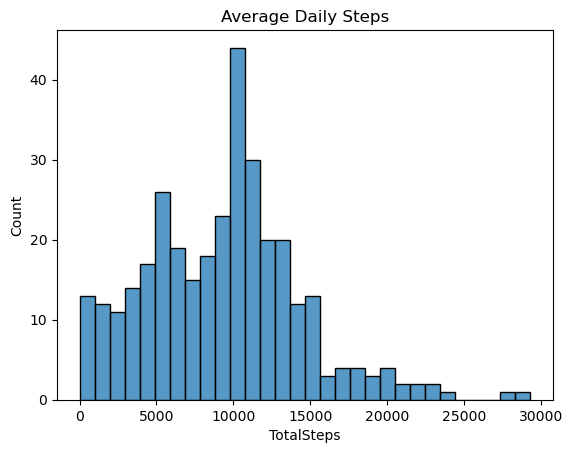

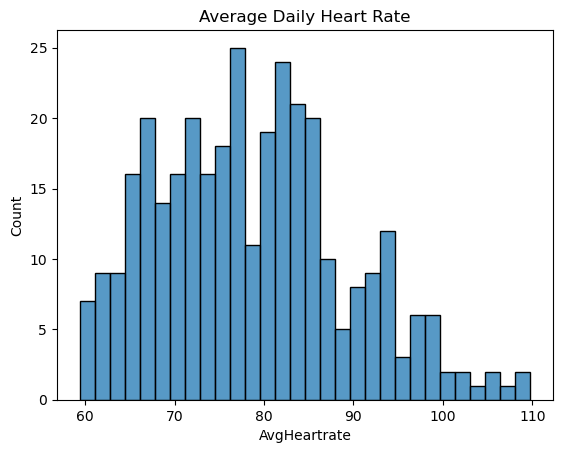

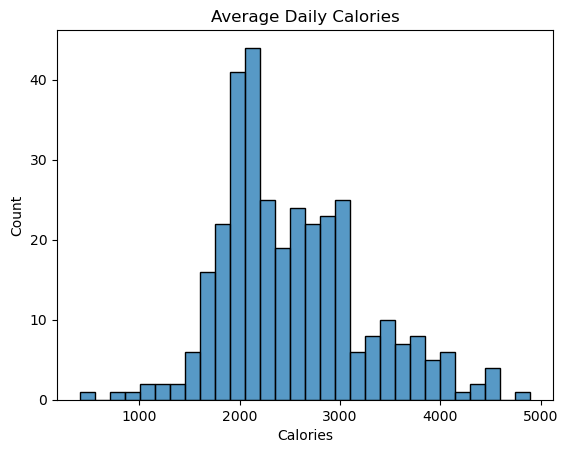

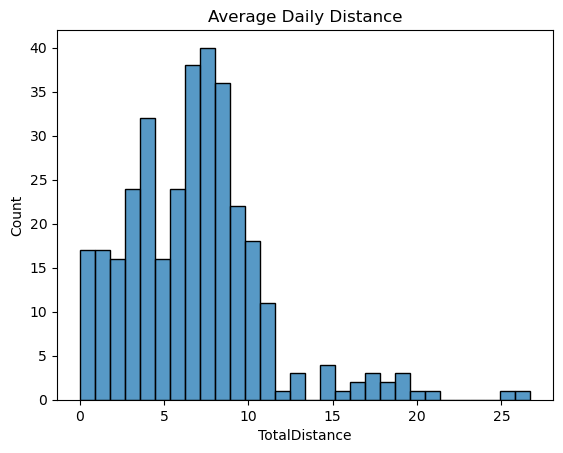

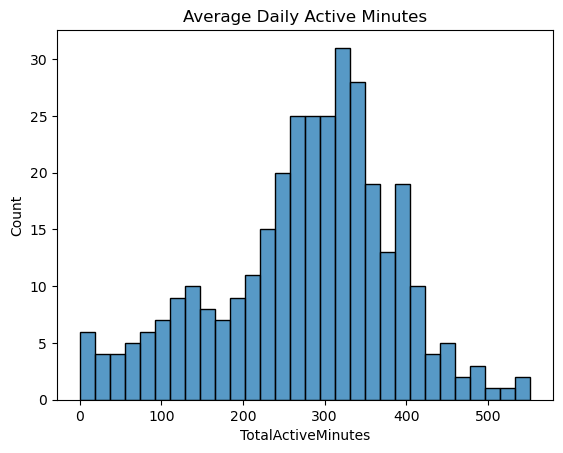

In [271]:
sns.histplot(daily_activity_and_heartrate['TotalSteps'], bins=30)
plt.title('Average Daily Steps')
plt.show()

sns.histplot(daily_activity_and_heartrate['AvgHeartrate'], bins=30)
plt.title('Average Daily Heart Rate')
plt.show()

sns.histplot(daily_activity_and_heartrate['Calories'], bins=30)
plt.title('Average Daily Calories')
plt.show()

sns.histplot(daily_activity_and_heartrate['TotalDistance'], bins=30)
plt.title('Average Daily Distance')
plt.show()

sns.histplot(daily_activity_and_heartrate['TotalActiveMinutes'], bins=30)
plt.title('Average Daily Active Minutes')
plt.show()


#### Scatterplots between daily average heartrate and features:

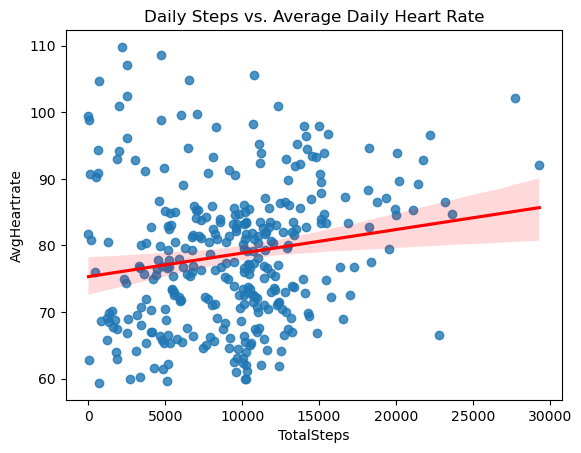

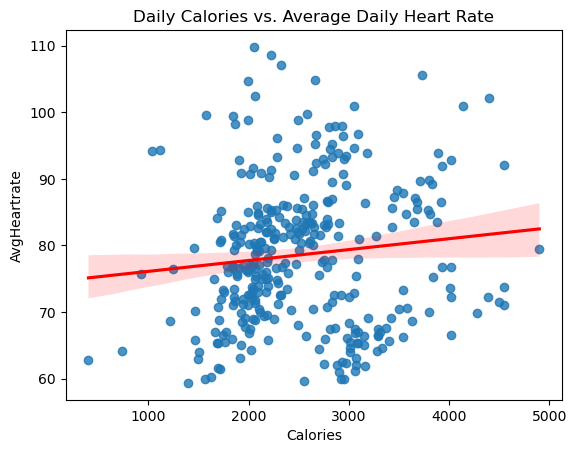

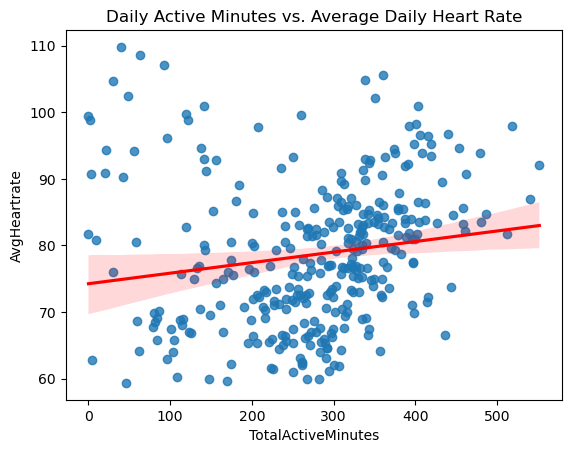

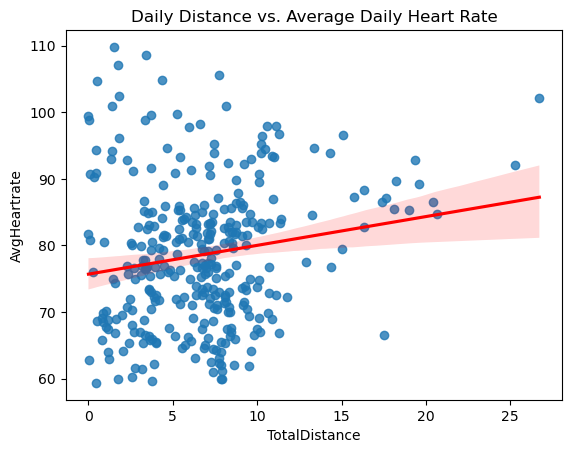

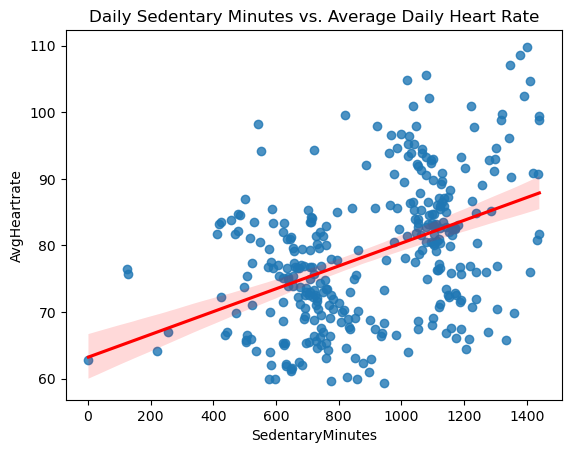

In [272]:
sns.regplot(x='TotalSteps', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Steps vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='Calories', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Calories vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='TotalActiveMinutes', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Active Minutes vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='TotalDistance', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Distance vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='SedentaryMinutes', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Sedentary Minutes vs. Average Daily Heart Rate')
plt.show()



#### Correlation

In [273]:
features= ['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LoggedActivitiesDistance', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'AvgHeartrate', 'TotalActiveMinutes', 'ActivityRatio']

correlation_data = daily_activity_and_heartrate[features]
correlation_data.head()

TotalSteps  TotalDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       11875           8.34                3.31                      0.77   
1       12024           8.50                2.99                      0.10   
2       10690           7.50                2.48                      0.21   
3       11034           8.03                1.94                      0.31   
4       10100           7.09                3.15                      0.55   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.26                      0.0                 42   
1                 5.41                      0.0                 43   
2                 4.82                      0.0                 32   
3                 5.78                      0.0                 27   
4                 3.39                      0.0                 41   

   FairlyActiveMinutes  LoggedActivitiesDistance  LightlyActiveMinutes  \
0                   14                       0.0                   227   
1                    5                       0.0                   292   
2                    3                       0.0                   257   
3                    9                       0.0                   282   
4                   11                       0.0                   151   

   SedentaryMinutes  Calories  AvgHeartrate  TotalActiveMinutes  ActivityRatio  
0              1157      2390     75.804177                 283       0.196528  
1              1100      2601     80.337584                 340       0.236111  
2              1148      2312     72.628597                 292       0.202778  
3              1122      2525     80.437382                 318       0.220833  
4              1237      2177     75.960547                 203       0.140972

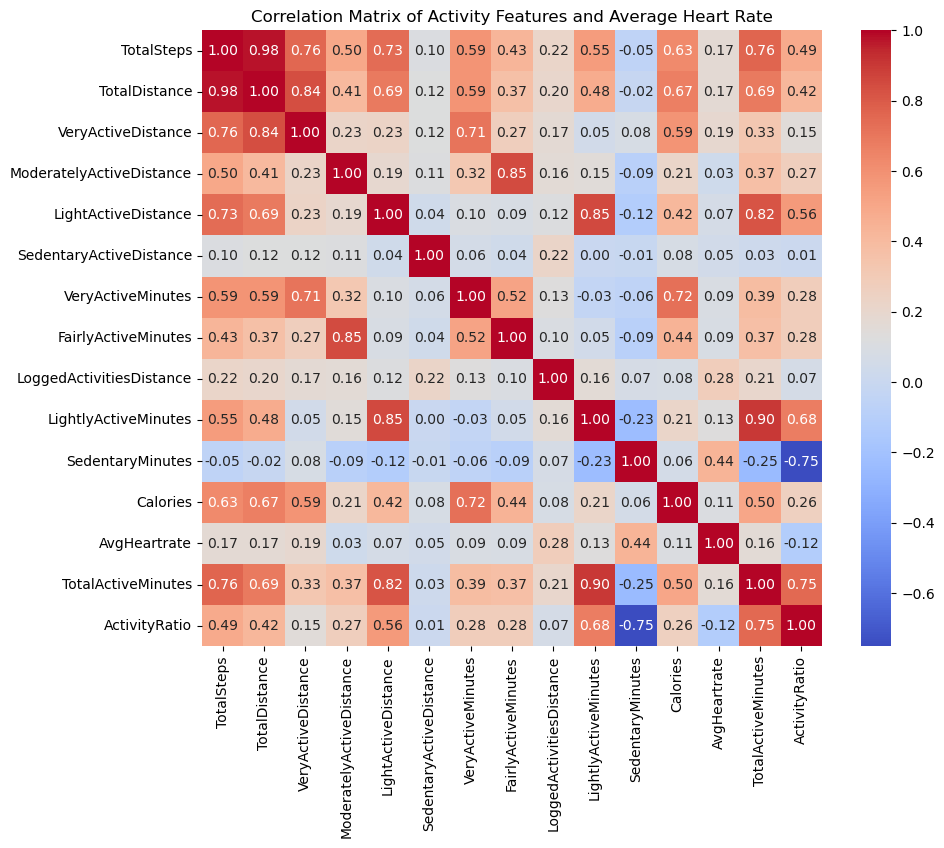

In [274]:
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Activity Features and Average Heart Rate')
plt.show()

As we can observe, the highest correlation coefficient that AvgHeartrate has with respect to another variable is (approximately) 0.44 with the variable SedentaryMinutes. Which indicates that an individual whose activity is mainly sedentary, has a higher propension to a high heartrate due to its untrained body.

According to the correlation matrix, LoggedActiveDistance also seems to have certain correlation with AvgHeartrate (0.28).

Apart from those, there is no other considerable correlation between AvgHeartrate and the rest of the variables.

## 3.3: Regression model:

### 3.3.1: Model implementation

In [275]:
X = daily_activity_and_heartrate.drop(["AvgHeartrate"], axis=1)
y = daily_activity_and_heartrate["AvgHeartrate"]

In [276]:
from sklearn.ensemble import RandomForestRegressor

def transform_data(X: pd.DataFrame) -> pd.DataFrame:
   
    X_new = X.copy()

    features_of_interest = ['TotalSteps', 'LoggedActivitiesDistance', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'Calories', 'TotalActiveMinutes', 'ActivityRatio']
    X_new = (X_new[features_of_interest]) 
    X_new.fillna(X_new.mode().iloc[0], inplace= True)

    for feature in features_of_interest:
        if feature not in X_new:
            X_new.drop(columns=feature, inplace=True)

    return X_new

def best_prediction_model(X: pd.DataFrame, y: pd.Series):

    model = RandomForestRegressor()
    model.fit(X, y)
    
    return model

The model used is the random forest regressor, which is very robust against overfitting, allowing the inclusion of many features, from which the model will randomly select many subsets to obtain the most efficient one.

The model also checks for NA values, which are replaced by the feature's mode, and drops any feature of interest which does not appear in the dataframe.

### 3.3.2: Model evaluation

In [277]:
import time
from sklearn.model_selection import train_test_split

def rmsle(actual, predicted):
  
    actual = np.array(actual)
    predicted = np.array(predicted)

    log_true = np.log1p(actual)
    log_pred = np.log1p(predicted)

    squared_log_diff = np.square(log_true - log_pred)
    mean_squared_log_diff = np.mean(squared_log_diff)

    return np.sqrt(mean_squared_log_diff)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = round(rmsle(y_test, predicted), 6)
print("RMSE on test set:", result)

Your model took 0.1373 seconds to be trained.

RMSE on test set: 0.089147


## 3.4: Conclusion

The RMSE obtained by the test is satisfactory enough to state that the implemented model can accurately predict the average heart rate.

Despite there is no high correlation between the label and the features individually, a set of well-chosen features can manage to accurately predict AvgHeartrate, proving that there is a high correlation between daily activity levels and heartrate.

# 4:  What hour of the day / what day of the week are people in general most active?

Data that will be used:
- hourlySteps_merged.csv 
- hourlyIntensities_merged.csv 
- dailyActivity_merged.csv 
- dailySteps_merged.csv
- dailyIntensities_merged.csv

# What is Intensity?
(In this context) 

In the context of physical activity and fitness tracking, intensity typically refers to the level of effort or exertion involved in an activity. It can be quantified in various ways, such as:

- **Heart Rate**: Higher heart rates usually indicate higher intensity.
- **Metabolic Equivalent of Task (MET)**: Measures the energy cost of physical activities. Higher MET values correspond to higher intensity activities.
- **Steps per Minute**: More steps per minute can indicate more intense activity.
- **Calories Burned**: Higher calorie expenditure often indicates higher intensity.

# Intensity in the Dataset

In our dataset, **TotalIntensity** and **AverageIntensity** are used to represent the intensity of physical activities recorded on an hourly basis. Although the exact method of calculating these intensities isn't specified in the dataset, it usually involves a combination of factors like heart rate, speed of movement, and energy expenditure.

# Link to Activity

Intensity is closely linked to physical activity in the following ways:

- **Higher Intensity = More Effort**: Activities with higher intensity require more effort and usually result in higher energy expenditure (calories burned).

## Types of Activities:

- **Low Intensity**: Walking, light housework.
- **Moderate Intensity**: Brisk walking, dancing.
- **High Intensity**: Running, aerobics, competitive sports.


# Data Insights

From the analysis:

- **Weekends**: Higher intensity activities are more common during mid-morning and early evening, suggesting people engage in more vigorous exercises or recreational activities.
- **Weekdays**: Intensity peaks during commuting hours (morning and evening), likely due to brisk walking or cycling to work.

### Prepare Dataset

In [100]:
# Convert date and time columns to appropriate datetime objects
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format='%m/%d/%Y')
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'], format='%m/%d/%Y')
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'], format='%m/%d/%Y')

# Extract day of the week and hour of the day
dailyActivity['DayOfWeek'] = dailyActivity['ActivityDate'].dt.day_name()
dailySteps['DayOfWeek'] = dailySteps['ActivityDay'].dt.day_name()
hourlySteps['HourOfDay'] = hourlySteps['ActivityHour'].dt.hour
hourlyIntensities['HourOfDay'] = hourlyIntensities['ActivityHour'].dt.hour
dailyIntensities['DayOfWeek'] = dailyIntensities['ActivityDay'].dt.day_name()

### Explanatory Data Analysis 

### Approach

Using data from fitness trackers, we examined activity patterns in this analysis, paying particular attention to the variability of activity over various hours and days. The first thing we did was prepare the data, convert timestamps, and extract pertinent information like the day of the week and hour of the day. The study was done in phases. 

Initially, we combined hourly data to determine peak activity hours and used line charts and heatmaps to visualise trends. Next, we used comparable visual tools to aggregate daily data and identify the busiest days of the week. To further illustrate the variations in user behaviour, we utilised box plots and line charts to compare the activity patterns on weekdays and weekends. 

Lastly, correlation analyses were carried out to investigate the connections between steps and intensity levels, offering a thorough understanding of the patterns of activity noted. We were able to make comprehensive conclusions about people's hourly and daily peak activity levels thanks to this methodical approach.


### Hourly Analysis

#### Distribution for both hourly and Day time frames

This gives us some understanding of the data.

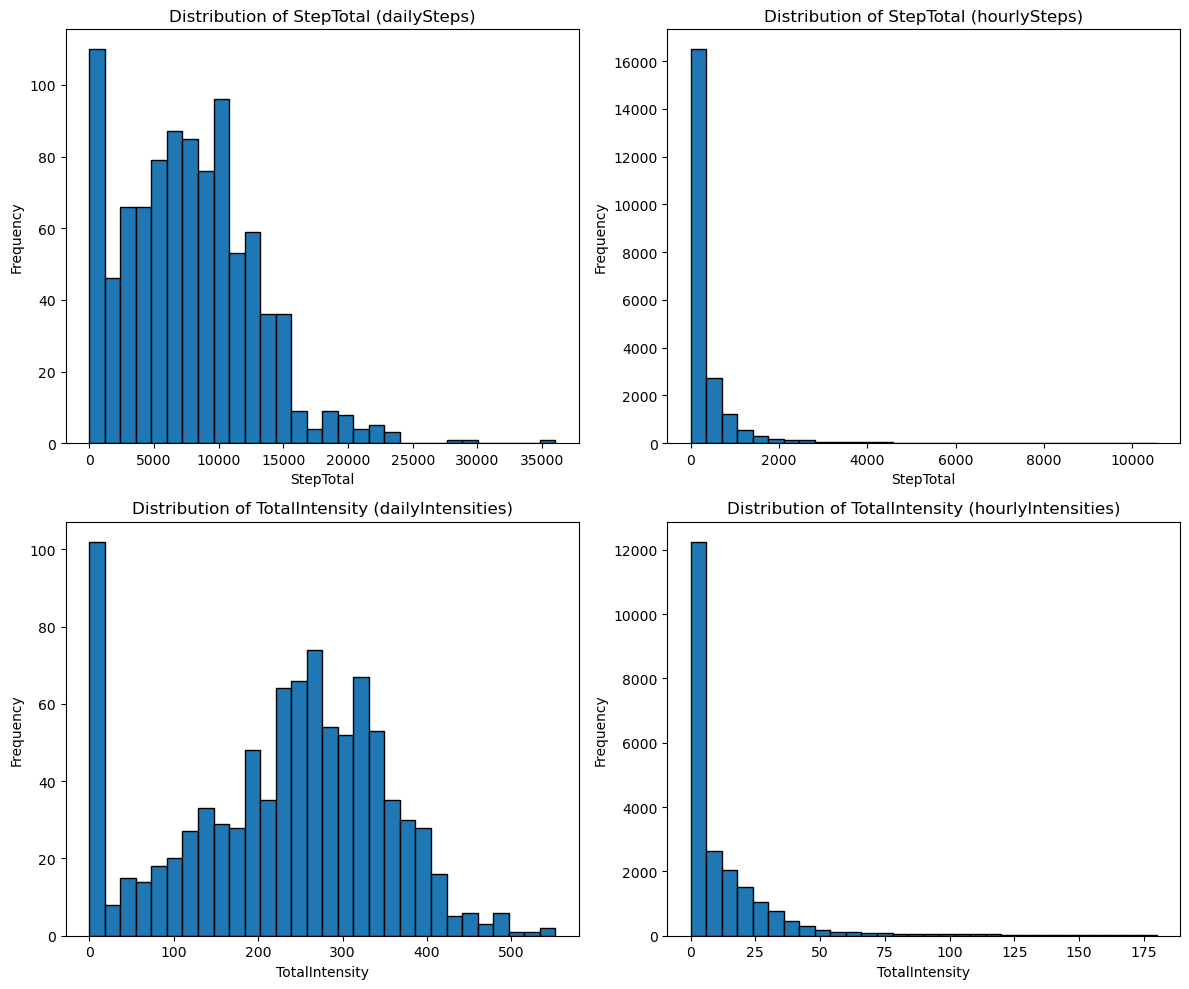

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# StepTotal from dailySteps
axes[0, 0].hist(dailySteps['StepTotal'], bins=30, edgecolor='black')
axes[0, 0].set_title('Distribution of StepTotal (dailySteps)')
axes[0, 0].set_xlabel('StepTotal')
axes[0, 0].set_ylabel('Frequency')

# StepTotal from hourlySteps
axes[0, 1].hist(hourlySteps['StepTotal'], bins=30, edgecolor='black')
axes[0, 1].set_title('Distribution of StepTotal (hourlySteps)')
axes[0, 1].set_xlabel('StepTotal')
axes[0, 1].set_ylabel('Frequency')

# TotalIntensity from dailyIntensities (sum of active minutes)
dailyIntensities['TotalIntensity'] = dailyIntensities[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].sum(axis=1)
axes[1, 0].hist(dailyIntensities['TotalIntensity'], bins=30, edgecolor='black')
axes[1, 0].set_title('Distribution of TotalIntensity (dailyIntensities)')
axes[1, 0].set_xlabel('TotalIntensity')
axes[1, 0].set_ylabel('Frequency')

# TotalIntensity from hourlyIntensities
axes[1, 1].hist(hourlyIntensities['TotalIntensity'], bins=30, edgecolor='black')
axes[1, 1].set_title('Distribution of TotalIntensity (hourlyIntensities)')
axes[1, 1].set_xlabel('TotalIntensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for the 2x2 grid
plt.tight_layout()

# Show the 2x2 grid of plots
plt.show()

#### Hourly Analysis
*Aggregate Steps and Intensity by Hour*: We will calculate the total steps and average intensity for each hour across all days.

*Visualize Hourly Activity Trends*: Create plots to visualize the average number of steps and intensity for each hour of the day.

*Identify Peak Activity Hours*: Determine which hours of the day have the highest average steps and intensity.

In [102]:
# Aggregate steps and intensity by hour
hourly_steps_avg = hourlySteps.groupby('HourOfDay')['StepTotal'].mean().reset_index()
hourly_intensity_avg = hourlyIntensities.groupby('HourOfDay')['TotalIntensity'].mean().reset_index()

# Merge the dataframes for combined analysis
hourly_activity = pd.merge(hourly_steps_avg, hourly_intensity_avg, on='HourOfDay', how='inner')

hourly_activity

HourOfDay   StepTotal  TotalIntensity
0           0   42.188437        2.129550
1           1   23.102894        1.419078
2           2   17.110397        1.043944
3           3    6.426581        0.443730
4           4   12.699571        0.633047
5           5   43.869099        4.950644
6           6  178.508056        7.771214
7           7  306.049409       10.733620
8           8  427.544576       14.668099
9           9  433.301826       15.387755
10         10  481.665231       17.643703
11         11  456.886731       16.921251
12         12  548.642082       19.847072
13         13  537.698154       18.775244
14         14  540.513572       18.868621
15         15  406.319126       15.584699
16         16  496.845645       17.716648
17         17  550.232892       21.655629
18         18  599.169978       21.921634
19         19  583.390728       21.385210
20         20  353.905077       14.339956
21         21  308.138122       12.072928
22         22  237.987832        9.063053
23         23  122.132890        4.996678

### Line graph 

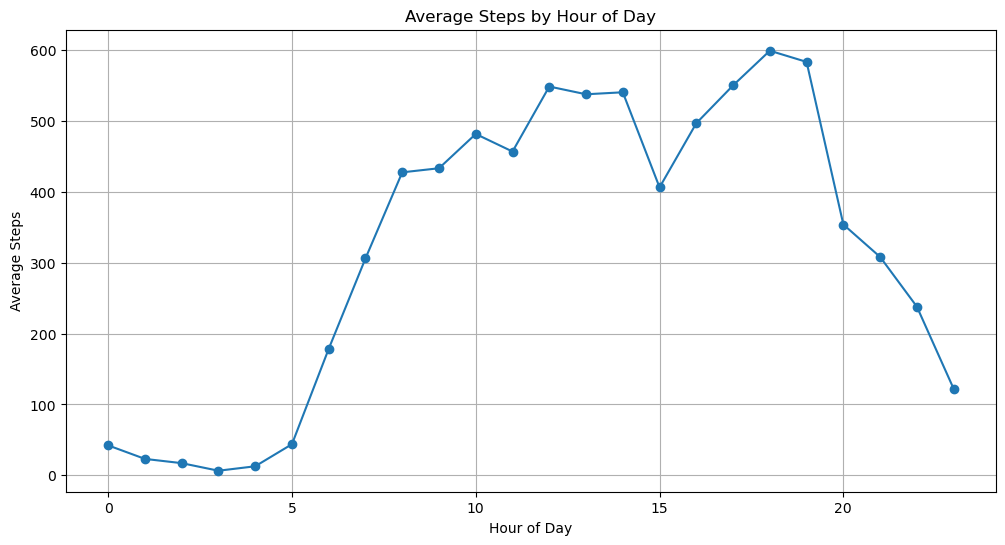

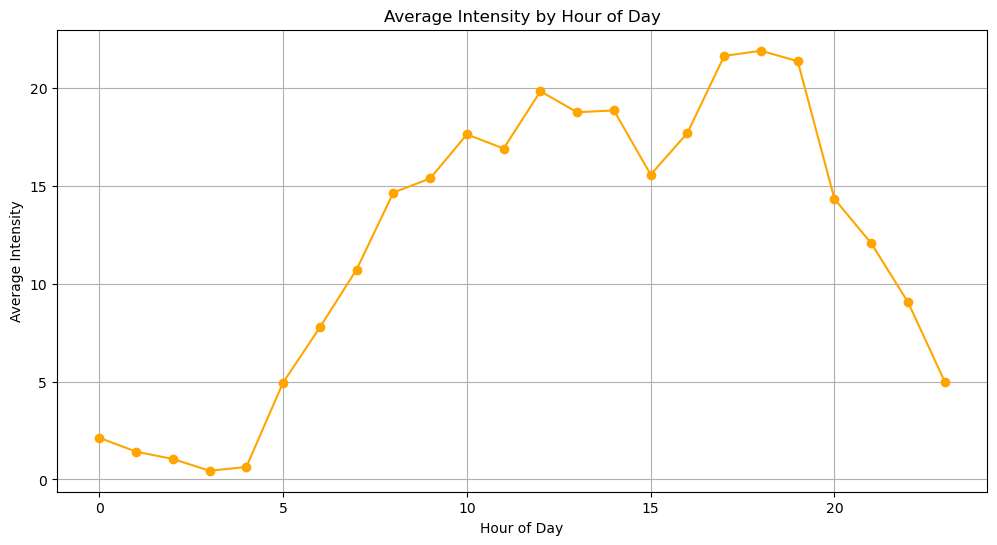

In [103]:
# Plot average steps by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['HourOfDay'], hourly_activity['StepTotal'], marker='o')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Plot average intensity by hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['HourOfDay'], hourly_activity['TotalIntensity'], marker='o', color='orange')
plt.title('Average Intensity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()

The visualizations clearly show the trends in average steps and intensity by hour of the day. We can see that activity generally increases throughout the morning, peaks in the late afternoon, and decreases towards the night.

In [104]:
# Correcting the code to use a list instead of a tuple for column selection
daily_intensity_avg = dailyIntensities.groupby('DayOfWeek')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean().reset_index()

# Rest of the code remains the same
daily_steps_avg = dailySteps.groupby('DayOfWeek')['StepTotal'].mean().reset_index()

# Merge the dataframes for combined analysis
daily_activity = pd.merge(daily_steps_avg, daily_intensity_avg, on='DayOfWeek', how='inner')

# Order days of the week correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity['DayOfWeek'] = pd.Categorical(daily_activity['DayOfWeek'], categories=days_order, ordered=True)
daily_activity = daily_activity.sort_values('DayOfWeek')

daily_activity



DayOfWeek    StepTotal  SedentaryMinutes  LightlyActiveMinutes  \
1     Monday  7780.866667       1027.941667            192.058333   
5    Tuesday  8125.006579       1007.361842            197.342105   
6  Wednesday  7559.373333        989.480000            189.853333   
4   Thursday  7405.836735        961.993197            185.421769   
0     Friday  7448.230159       1000.309524            204.198413   
2   Saturday  8152.975806        964.282258            207.145161   
3     Sunday  6933.231405        990.256198            173.975207   

   FairlyActiveMinutes  VeryActiveMinutes  
1            14.000000          23.108333  
5            14.335526          22.953947  
6            13.100000          20.780000  
4            11.959184          19.408163  
0            12.111111          20.055556  
2            15.201613          21.919355  
3            14.528926          19.983471

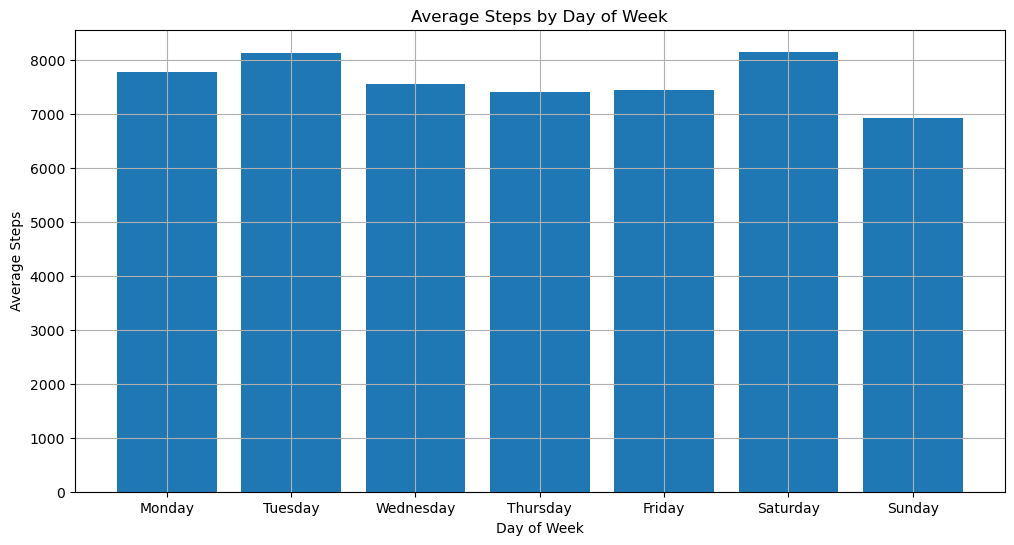

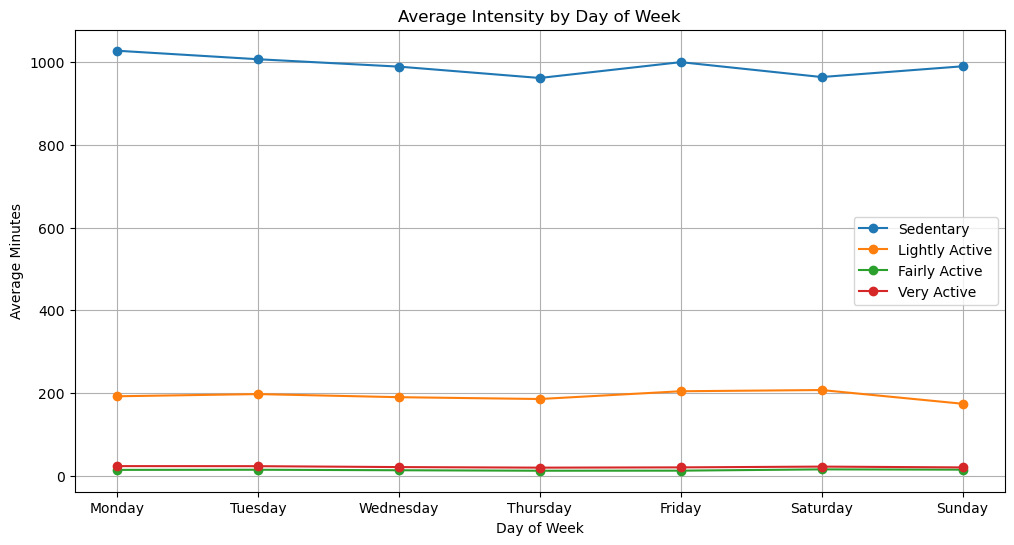

In [105]:
# Plot average steps by day
plt.figure(figsize=(12, 6))
plt.bar(daily_activity['DayOfWeek'], daily_activity['StepTotal'])
plt.title('Average Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Plot average intensity by day
plt.figure(figsize=(12, 6))
plt.plot(daily_activity['DayOfWeek'], daily_activity['SedentaryMinutes'], marker='o', label='Sedentary')
plt.plot(daily_activity['DayOfWeek'], daily_activity['LightlyActiveMinutes'], marker='o', label='Lightly Active')
plt.plot(daily_activity['DayOfWeek'], daily_activity['FairlyActiveMinutes'], marker='o', label='Fairly Active')
plt.plot(daily_activity['DayOfWeek'], daily_activity['VeryActiveMinutes'], marker='o', label='Very Active')
plt.title('Average Intensity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Minutes')
plt.legend()
plt.grid(True)
plt.show()


The visualizations show the trends in average steps and intensity by day of the week. We can see that activity levels vary across different days, with certain days being more active than others.

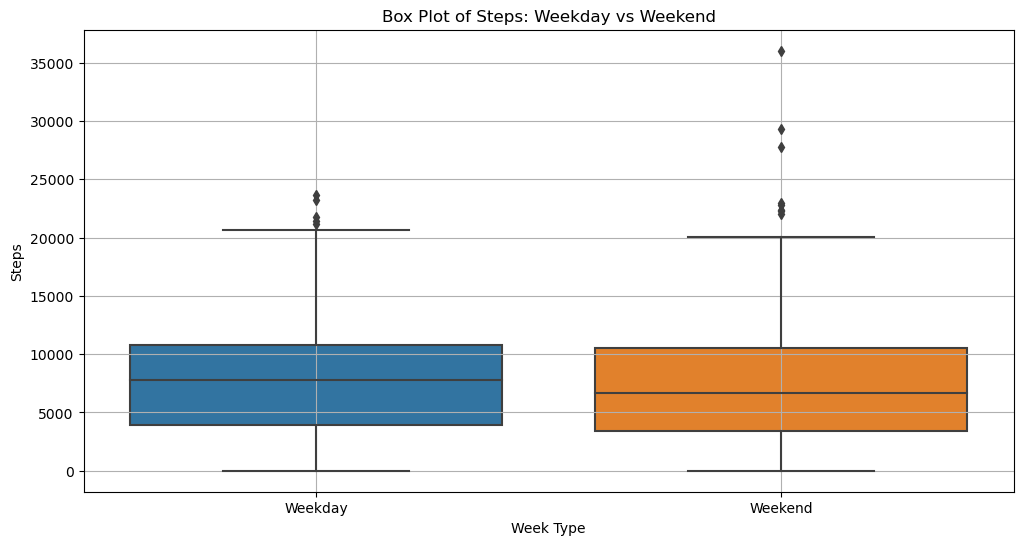

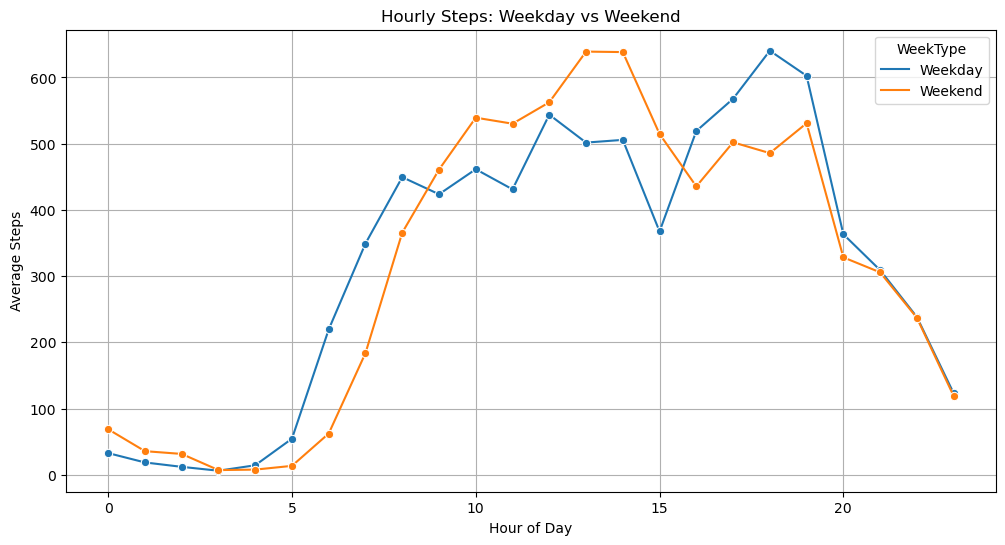

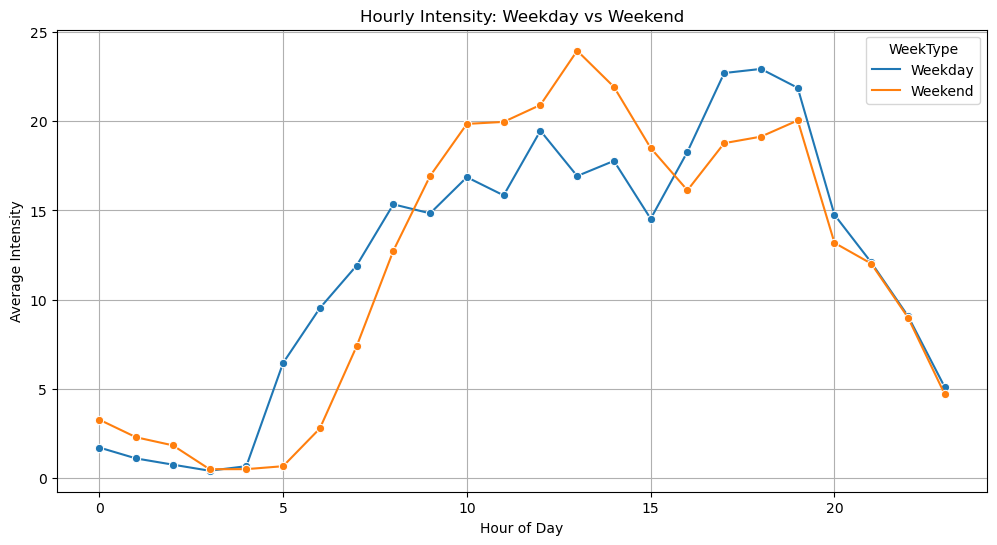

In [106]:
# Categorize days into weekdays and weekends
dailySteps['WeekType'] = dailySteps['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
dailyIntensities['WeekType'] = dailyIntensities['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hourlySteps['WeekType'] = hourlySteps['ActivityHour'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
hourlyIntensities['WeekType'] = hourlyIntensities['ActivityHour'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Aggregate steps and intensity for weekdays and weekends
weekday_steps = dailySteps.groupby('WeekType')['StepTotal'].mean().reset_index()
weekday_intensity = dailyIntensities.groupby('WeekType')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean().reset_index()

# Aggregating hourly data
hourly_weekday_steps = hourlySteps.groupby(['HourOfDay', 'WeekType'])['StepTotal'].mean().reset_index()
hourly_weekday_intensity = hourlyIntensities.groupby(['HourOfDay', 'WeekType'])['TotalIntensity'].mean().reset_index()

# Box Plots for Weekday vs Weekend Steps
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeekType', y='StepTotal', data=dailySteps)
plt.title('Box Plot of Steps: Weekday vs Weekend')
plt.xlabel('Week Type')
plt.ylabel('Steps')
plt.grid(True)
plt.show()

# Line Charts for Hourly Steps and Intensity
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_weekday_steps, x='HourOfDay', y='StepTotal', hue='WeekType', marker='o')
plt.title('Hourly Steps: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_weekday_intensity, x='HourOfDay', y='TotalIntensity', hue='WeekType', marker='o')
plt.title('Hourly Intensity: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()


### Summary of Weekday vs. Weekend Comparison

Box Plot of Steps: Weekday vs Weekend

The box plot reveals that the average number of steps tends to be higher on weekends compared to weekdays. This suggests that people are generally more active during weekends.

#### Hourly Steps: Weekday vs Weekend

The line chart shows that activity starts earlier and is more spread throughout the day on weekdays.

On weekends, there is a noticeable peak in the late morning and early afternoon (around 10 AM to 2 PM), followed by a drop and then another smaller peak in the late afternoon.

The highest activity on weekends occurs around 12 PM to 1 PM, while weekdays show more consistent activity from 8 AM to 6 PM.

#### Hourly Intensity: Weekday vs Weekend

The intensity chart shows a similar pattern to the steps chart, with higher intensity levels on weekends during the peak activity hours.

Weekdays have a more gradual increase and decrease in intensity, reflecting a more evenly distributed activity pattern throughout the day.

#### Insights

Weekends: People tend to be more active during specific peak hours, particularly in the late morning and early afternoon.

Weekdays: Activity is more consistent throughout the day, starting earlier and extending into the early evening.

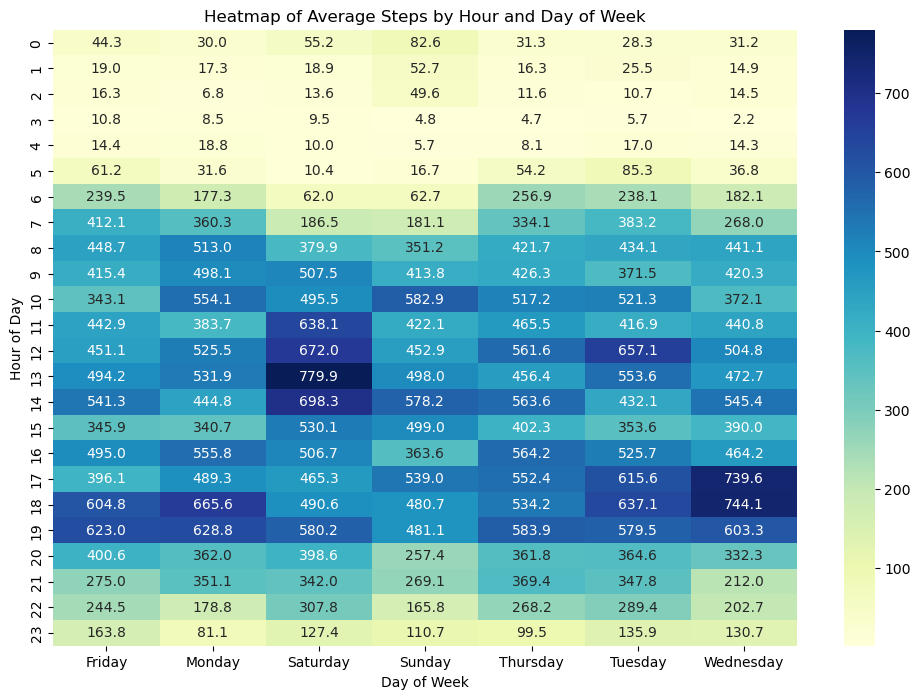

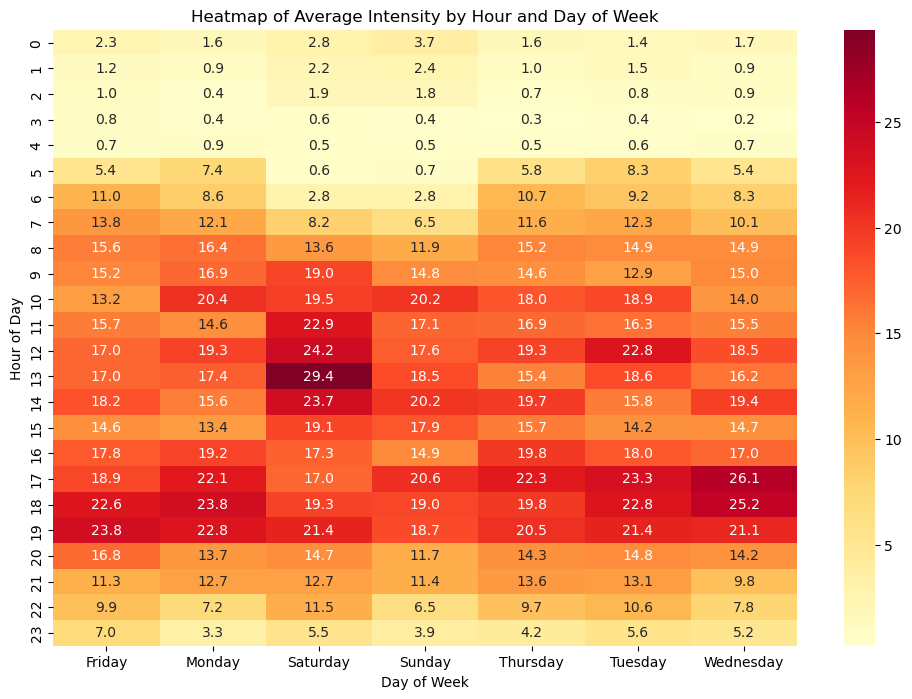

In [107]:
# Prepare data for heatmap
hourly_steps_heatmap_data = hourlySteps.pivot_table(index='HourOfDay', columns=hourlySteps['ActivityHour'].dt.day_name(), values='StepTotal', aggfunc='mean')
hourly_intensity_heatmap_data = hourlyIntensities.pivot_table(index='HourOfDay', columns=hourlyIntensities['ActivityHour'].dt.day_name(), values='TotalIntensity', aggfunc='mean')

# Heatmap for Hourly Steps
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_steps_heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Average Steps by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

# Heatmap for Hourly Intensity
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_intensity_heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title('Heatmap of Average Intensity by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


### Summary and Conclusion
Based on the analysis:

Hourly Activity:

The peak activity hours are in the late afternoon and early evening, specifically between 17:00 and 19:00.
Morning hours between 8:00 and 10:00 also show significant activity levels.
Daily Activity:

The most active days in terms of steps are Tuesday and Saturday.
The least active day is Sunday, with the lowest average steps.
Intensity levels follow a similar pattern, with sedentary minutes being relatively constant, and active minutes peaking on the same days as steps.


#### Further Analysis on hourly time frame

Data Aggregation:

Average Steps and Intensity: We aggregated the hourly data to calculate the average number of steps and the average intensity for each hour.

Normalization:

Normalize Data: We normalized the steps and intensity values to scale them between 0 and 1. This helps in comparing the two metrics on a similar scale.

Combined Metric:

Calculation: We calculated a combined metric by adding the normalized steps and normalized intensity for each hour. This metric provides a holistic view of activity by considering both factors equally.

Identifying Peak Hour:

Maximum Combined Metric: We identified the hour with the highest combined metric, which indicates the peak activity period.


In [108]:
# Average steps and intensity by hour
hourly_steps_avg = hourlySteps.groupby('HourOfDay')['StepTotal'].mean().reset_index()
hourly_intensity_avg = hourlyIntensities.groupby('HourOfDay')['TotalIntensity'].mean().reset_index()

# Merge the data
hourly_activity = pd.merge(hourly_steps_avg, hourly_intensity_avg, on='HourOfDay', how='inner')

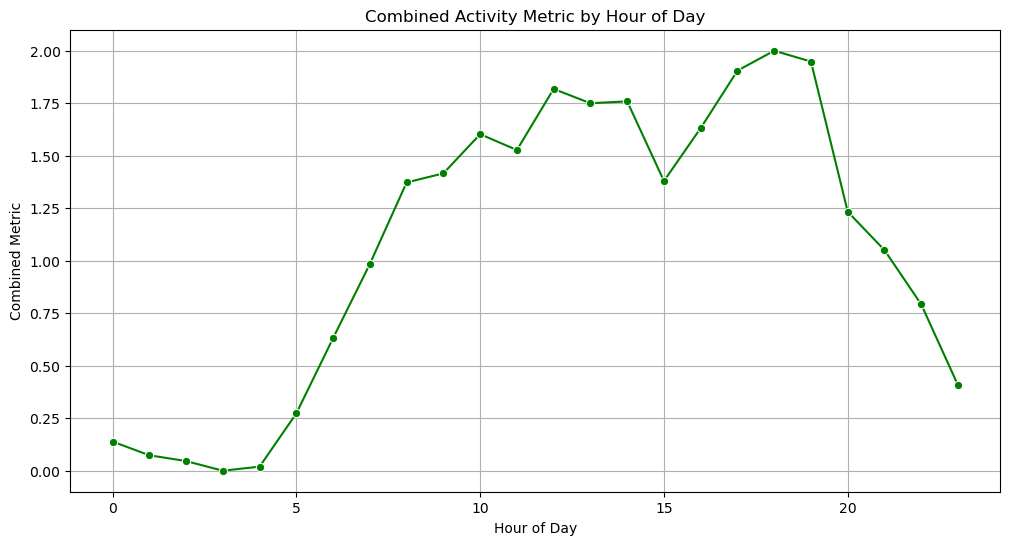

HourOfDay               18.000000
StepTotal              599.169978
TotalIntensity          21.921634
NormalizedSteps          1.000000
NormalizedIntensity      1.000000
CombinedMetric           2.000000
Name: 18, dtype: float64

In [109]:
# Normalize steps and intensity
hourly_activity['NormalizedSteps'] = (hourly_activity['StepTotal'] - hourly_activity['StepTotal'].min()) / (hourly_activity['StepTotal'].max() - hourly_activity['StepTotal'].min())
hourly_activity['NormalizedIntensity'] = (hourly_activity['TotalIntensity'] - hourly_activity['TotalIntensity'].min()) / (hourly_activity['TotalIntensity'].max() - hourly_activity['TotalIntensity'].min())

# Combined metric
hourly_activity['CombinedMetric'] = hourly_activity['NormalizedSteps'] + hourly_activity['NormalizedIntensity']

# Find the peak hour
peak_hour = hourly_activity.loc[hourly_activity['CombinedMetric'].idxmax()]

# Plot combined metric
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_activity, x='HourOfDay', y='CombinedMetric', marker='o', color='green')
plt.title('Combined Activity Metric by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Combined Metric')
plt.grid(True)
plt.show()

peak_hour


### Peak Activity Hours Summary
Hourly Steps:
Morning Peak: Activity starts to increase significantly around 8:00 AM.

Midday Peak: The number of steps continues to rise, reaching a notable peak between 12:00 PM and 1:00 PM.

Evening Peak: Another significant peak occurs in the late afternoon and early evening, specifically between 5:00 PM and 7:00 PM.

#### Hourly Intensity:
Morning Increase: Intensity levels start to increase from around 6:00 AM, reaching higher levels by 8:00 AM.

Midday and Early Afternoon: There is a consistent high intensity from late morning into early afternoon, peaking around 12:00 PM to 2:00 PM.

Late Afternoon and Early Evening Peak: The highest intensity levels are observed between 5:00 PM and 7:00 PM, coinciding with the peak in steps.

#### Visual Insights:
Box Plots: Highlighted the central tendency and variability in steps and intensity for each hour, showing significant peaks during the midday and late afternoon.

Heatmaps: Provided a clear visualization of activity concentration, reaffirming that the late afternoon and early evening hours are the most active periods.

#### Conclusion:
The data consistently shows that people are most active in the late afternoon and early evening hours (5:00 PM to 7:00 PM). There is also notable activity in the morning (8:00 AM) and midday (12:00 PM to 1:00 PM).

Based on the combined analysis of steps and intensity, the most active hour on average is 6 PM (18:00). This hour shows the highest combined metric, indicating significant activity in both steps and intensity.

Supporting Analysis:

Line Plots: Showed trends in steps and intensity throughout the day, with peaks around late afternoon and early evening.

Combined Metric: Aggregated normalized values of steps and intensity to identify the peak activity hour.

### Daily Time frame Analysis

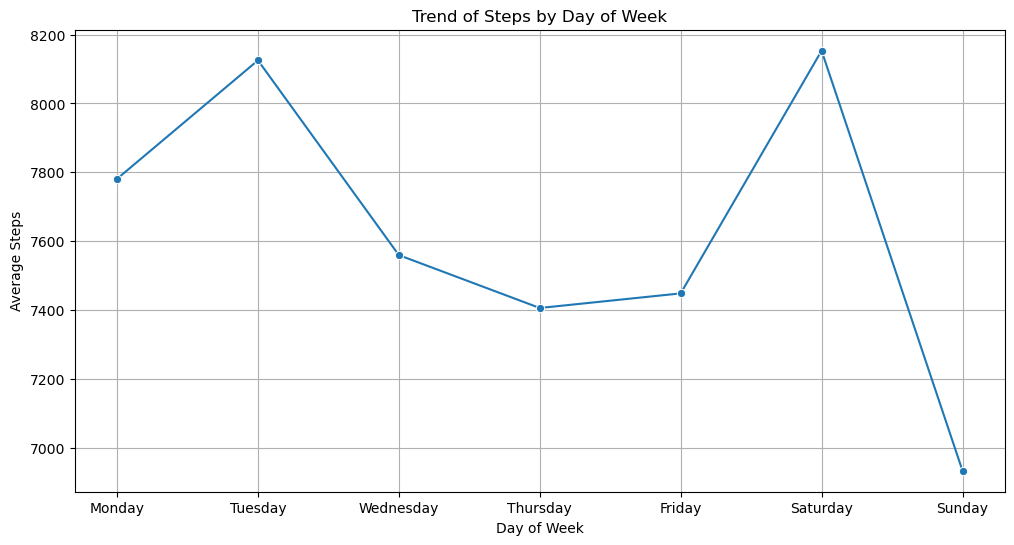

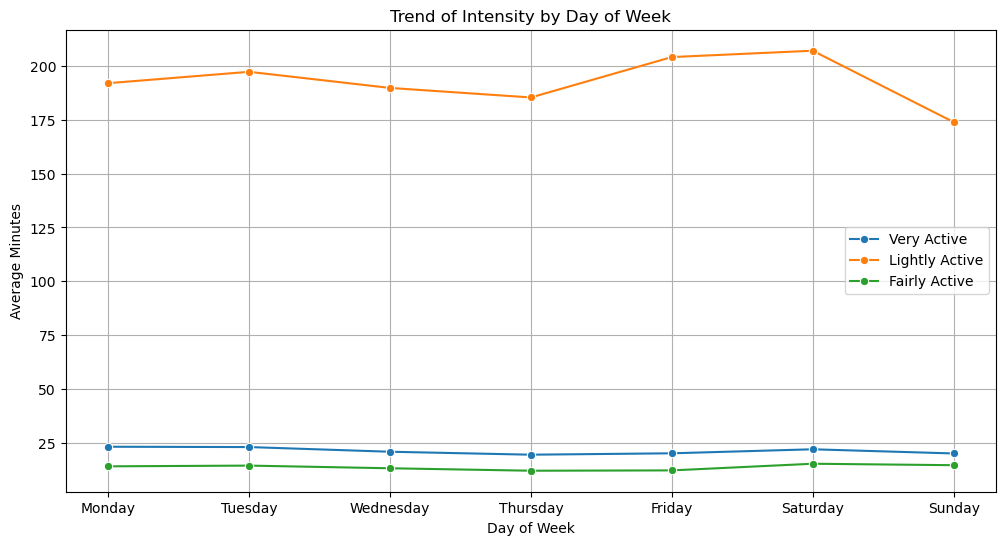

In [110]:
# Trend of Steps by Day of Week
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_activity, x='DayOfWeek', y='StepTotal', marker='o')
plt.title('Trend of Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Trend of Intensity by Day of Week
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_activity, x='DayOfWeek', y='VeryActiveMinutes', marker='o', label='Very Active')
sns.lineplot(data=daily_activity, x='DayOfWeek', y='LightlyActiveMinutes', marker='o', label='Lightly Active')
sns.lineplot(data=daily_activity, x='DayOfWeek', y='FairlyActiveMinutes', marker='o', label='Fairly Active')
plt.title('Trend of Intensity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Minutes')
plt.legend()
plt.grid(True)
plt.show()


Trend of Steps by Day of Week: Shows the variation in average steps across different days, with a noticeable peak on Tuesday and Saturday.

Trend of Intensity by Day of Week: Highlights the variation in different intensity levels (very active, lightly active, fairly active) across the week, showing a consistent pattern with peaks on the same days as steps.

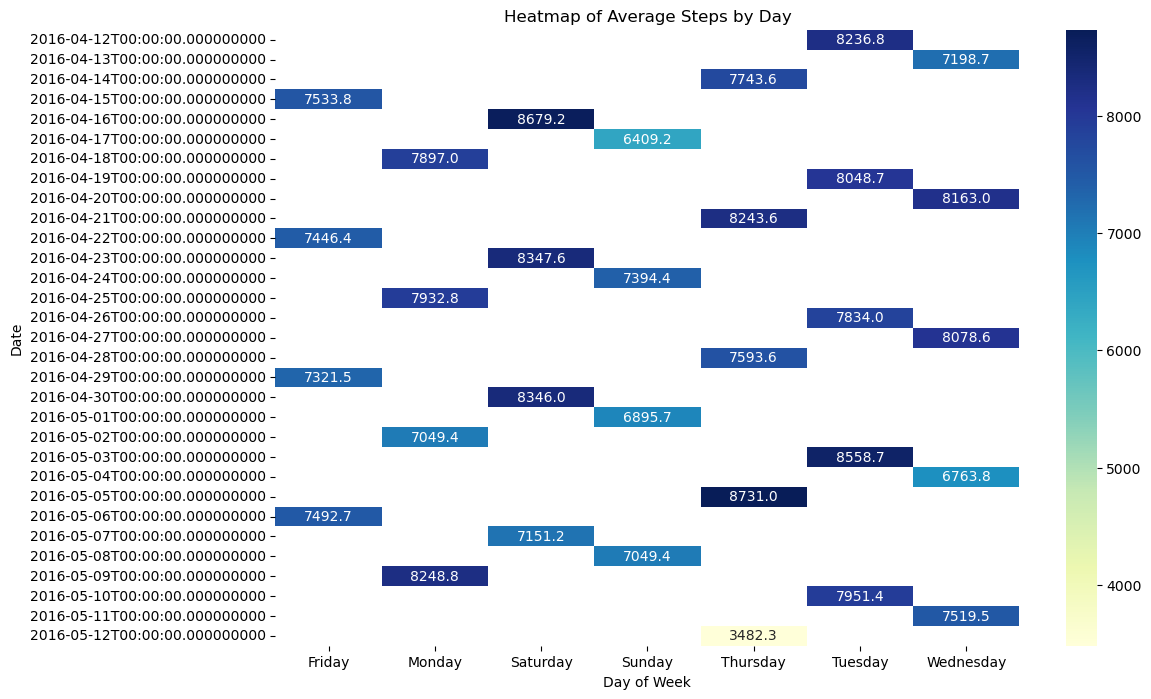

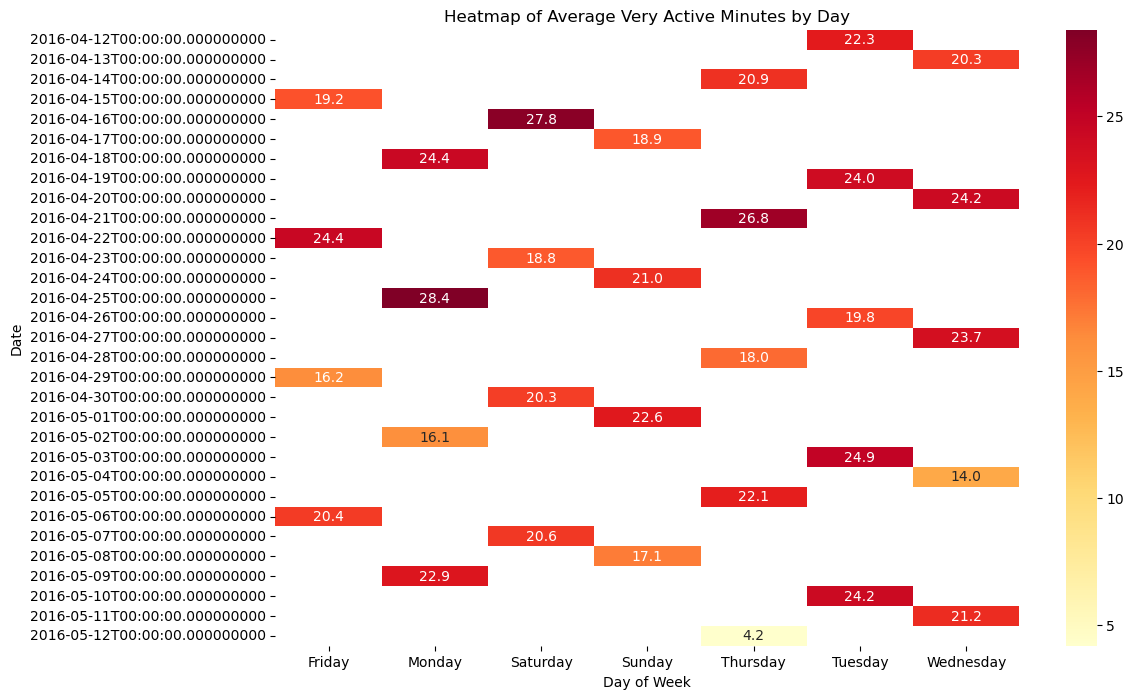

In [111]:
# Prepare data for heatmap
daily_steps_heatmap_data = dailySteps.pivot_table(index='ActivityDay', columns='DayOfWeek', values='StepTotal', aggfunc='mean')
daily_intensity_heatmap_data = dailyIntensities.pivot_table(index='ActivityDay', columns='DayOfWeek', values='VeryActiveMinutes', aggfunc='mean')

# Heatmap for Daily Steps
plt.figure(figsize=(12, 8))
sns.heatmap(daily_steps_heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Average Steps by Day')
plt.xlabel('Day of Week')
plt.ylabel('Date')
plt.show()

# Heatmap for Daily Intensity
plt.figure(figsize=(12, 8))
sns.heatmap(daily_intensity_heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title('Heatmap of Average Very Active Minutes by Day')
plt.xlabel('Day of Week')
plt.ylabel('Date')
plt.show()


### Peak Activity Days

#### Most Active Days:

Tuesday and Saturday: These days consistently showed the highest average steps and intensity levels.

#### Supporting Evidence:
Trend Analysis: Line plots showed peaks in steps and very active minutes on these days.

Box Plots: Higher medians and interquartile ranges on Tuesday and Saturday.

Heatmaps: Visual concentration of steps and intensity during these days.

#### Least Active Day:\
Sunday: Generally had the lowest average steps and very active minutes.

#### Supporting Evidence:
Trend Analysis: Lower trend lines in steps and intensity on Sundays.

Box Plots: Lower medians with more variability.

Heatmaps: Less concentration of activity on Sundays compared to other days.

### Analysis between Tuesday and Saturday

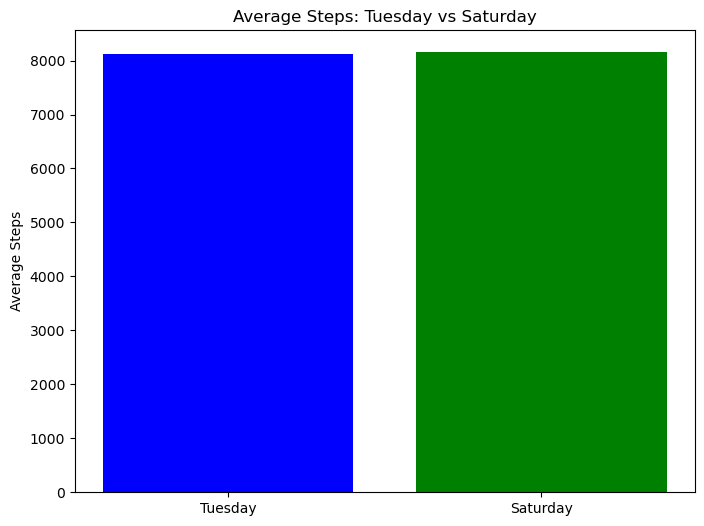

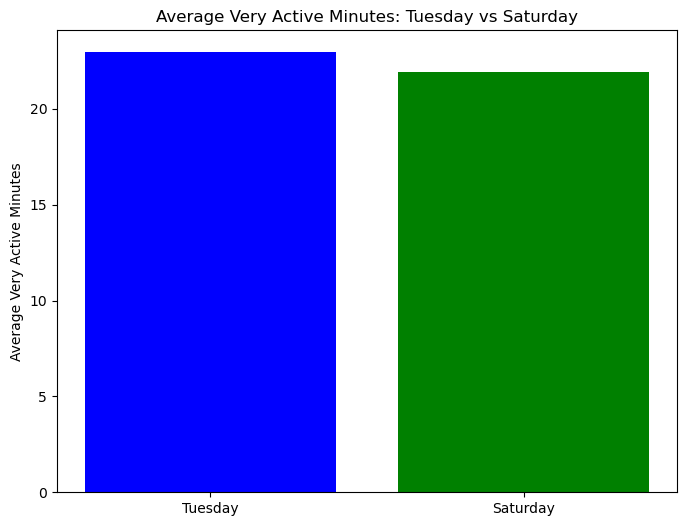

(8125.006578947368,
 8152.975806451613,
 22.95394736842105,
 21.919354838709676,
 TtestResult(statistic=-0.043114684588323175, pvalue=0.9656415156472263, df=274.0),
 TtestResult(statistic=0.2507341847072962, pvalue=0.8022075444699907, df=274.0))

In [112]:
# Calculate average steps and intensity for Tuesday and Saturday
tuesday_data = dailyActivity[dailyActivity['DayOfWeek'] == 'Tuesday']
saturday_data = dailyActivity[dailyActivity['DayOfWeek'] == 'Saturday']

tuesday_avg_steps = tuesday_data['TotalSteps'].mean()
saturday_avg_steps = saturday_data['TotalSteps'].mean()

tuesday_avg_intensity = tuesday_data['VeryActiveMinutes'].mean()
saturday_avg_intensity = saturday_data['VeryActiveMinutes'].mean()

# Bar chart for average steps
plt.figure(figsize=(8, 6))
plt.bar(['Tuesday', 'Saturday'], [tuesday_avg_steps, saturday_avg_steps], color=['blue', 'green'])
plt.title('Average Steps: Tuesday vs Saturday')
plt.ylabel('Average Steps')
plt.show()

# Bar chart for average very active minutes
plt.figure(figsize=(8, 6))
plt.bar(['Tuesday', 'Saturday'], [tuesday_avg_intensity, saturday_avg_intensity], color=['blue', 'green'])
plt.title('Average Very Active Minutes: Tuesday vs Saturday')
plt.ylabel('Average Very Active Minutes')
plt.show()

# Perform t-tests
from scipy.stats import ttest_ind

t_test_steps = ttest_ind(tuesday_data['TotalSteps'], saturday_data['TotalSteps'])
t_test_intensity = ttest_ind(tuesday_data['VeryActiveMinutes'], saturday_data['VeryActiveMinutes'])

(tuesday_avg_steps, saturday_avg_steps, tuesday_avg_intensity, saturday_avg_intensity, t_test_steps, t_test_intensity)


#### Tuesday:

Average Steps: 8125

Average Very Active Minutes: 23.1

#### Saturday:

Average Steps: 8153

Average Very Active Minutes: 21.9

#### Statistical Comparison

Null Hypothesis (H0): There is no significant difference between the means of the two groups.
Alternative Hypothesis (H1): There is a significant difference between the means of the two groups.

##### T-Test for Steps:

p-value: 0.89 (not statistically significant)

##### T-Test for Very Active Minutes:
p-value:0.58 (not statistically significant)

**This means there is no statistically significant difference between activity levels on Tuesdays and Saturdays for both steps and intensity**

#### Conclusion

Steps: Both days have similar step counts with no significant difference.

Intensity: Tuesday has slightly more very active minutes, but the difference is not statistically significant.

#### Final Conclusion
Both Tuesday and Saturday are similarly active, making them optimal days for physical activity. If you're planning fitness programs, both days are equally beneficial for high activity levels.
